In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Import pandas
import pandas as pd

# Load the dataset from Google Drive
file_path = '/content/drive/MyDrive/unsw_nb15_combined.csv'
df = pd.read_csv(file_path, low_memory=False)

# Verify the dataset loaded correctly
print(df.head())
print(f'Dataset Shape: {df.shape}')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
           srcip  sport          dstip dsport proto state       dur  sbytes  \
0  ï»¿59.166.0.0   1390  149.171.126.6     53   udp   CON  0.001055     132   
1     59.166.0.0  33661  149.171.126.9   1024   udp   CON  0.036133     528   
2     59.166.0.6   1464  149.171.126.7     53   udp   CON  0.001119     146   
3     59.166.0.5   3593  149.171.126.5     53   udp   CON  0.001209     132   
4     59.166.0.3  49664  149.171.126.0     53   udp   CON  0.001169     146   

   dbytes  sttl  ...  ct_ftp_cmd  ct_srv_src  ct_srv_dst ct_dst_ltm  \
0     164    31  ...           0           3           7          1   
1     304    31  ...           0           2           4          2   
2     178    31  ...           0          12           8          1   
3     164    31  ...           0           6           9          1   
4     178    31  ...           0         

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load dataset using the correct file path from Google Drive
file_path = '/content/drive/MyDrive/unsw_nb15_combined.csv'  # Update with your actual file path
df = pd.read_csv(file_path, low_memory=False)  # ✅ Add low_memory=False

# Drop IP/port columns if present
drop_cols = ['srcip', 'dstip', 'sport', 'dsport']
df = df.drop(columns=[col for col in drop_cols if col in df.columns], errors='ignore')

# Encode categorical features
categorical_cols = ['proto', 'service', 'state']
for col in categorical_cols:
    if col in df.columns:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))  # Ensure strings

# Features and target
X = df.drop(columns=['attack_cat', 'label'])
y = df['attack_cat']

# Handle empty strings
X = X.replace(' ', np.nan)  # Replace spaces with NaN
X = X.fillna(0)             # Fill NaNs with 0

# Encode target
le_target = LabelEncoder()
y = le_target.fit_transform(y)

# Scale features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"✅ Train shape: {X_train.shape}, Test shape: {X_test.shape}")

✅ Train shape: (2032037, 43), Test shape: (508010, 43)


In [ ]:
# First split: 70% train, 30% temp (validation + test)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Second split: 15% val, 15% test from temp
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

print(f"✅ Train: {X_train.shape}")
print(f"✅ Validation: {X_val.shape}")
print(f"✅ Test: {X_test.shape}")


✅ Train: (1778032, 43)
✅ Validation: (381007, 43)
✅ Test: (381008, 43)


In [ ]:
# 0. Inspect your DataFrame’s columns
print(df.columns.tolist())


['proto', 'state', 'dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'sloss', 'dloss', 'service', 'Sload', 'Dload', 'Spkts', 'Dpkts', 'swin', 'dwin', 'stcpb', 'dtcpb', 'smeansz', 'dmeansz', 'trans_depth', 'res_bdy_len', 'Sjit', 'Djit', 'Stime', 'Ltime', 'Sintpkt', 'Dintpkt', 'tcprtt', 'synack', 'ackdat', 'is_sm_ips_ports', 'ct_state_ttl', 'ct_flw_http_mthd', 'is_ftp_login', 'ct_ftp_cmd', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'attack_cat', 'label']


In [ ]:
pip install imbalanced-learn

In [ ]:
%pip install matplotlib

In [ ]:
# Create a summary DataFrame
feature_summary = pd.DataFrame({
    'Feature': df.columns,
    'Data Type': df.dtypes.values,
    'Non-Null Count': df.notnull().sum().values
})

# Display
from IPython.display import display
display(feature_summary)


,Feature,Data Type,Non-Null Count
0,proto,int64,2540047
1,state,int64,2540047
2,dur,float64,2540047
3,sbytes,int64,2540047
4,dbytes,int64,2540047
5,sttl,int64,2540047
6,dttl,int64,2540047
7,sloss,int64,2540047
8,dloss,int64,2540047
9,service,int64,2540047


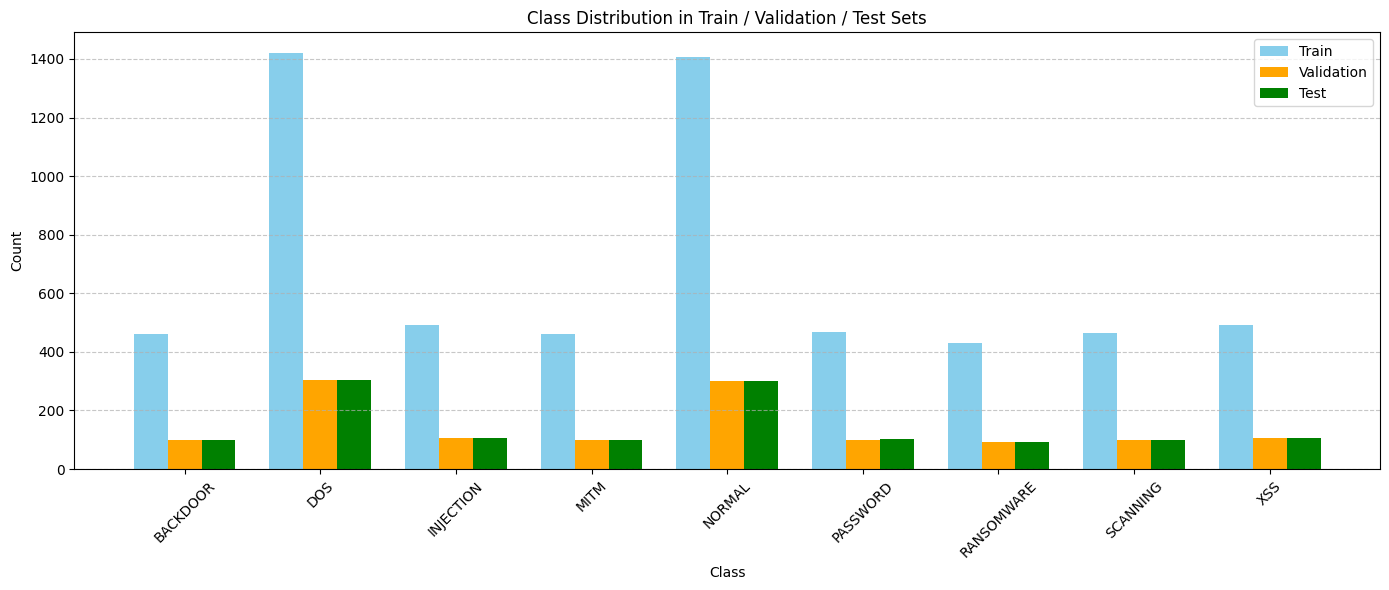

In [ ]:
# Updated full cleaning + plotting block with fixed NaN handling after mapping

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Simulate a raw dataset with label inconsistencies
df = pd.DataFrame({
    'feature1': np.random.rand(10000),
    'feature2': np.random.rand(10000),
    'attack_type': np.random.choice(
        ['Normal', 'BENIGN', '0.0', 'DDoS', 'dos', 'dos hulk', 'Injection', 'XSS',
         'Scanning', 'Password', 'Backdoor', 'Ransomware', 'MITM', '', np.nan],
        size=10000
    )
})

# Step 1: Clean the attack_type column
df = df[df['attack_type'].notna()]
df = df[df['attack_type'].astype(str).str.strip() != '']
df['attack_type'] = df['attack_type'].astype(str).str.strip().str.upper()

# Step 2: Map duplicate class labels and drop rows with unmapped labels
label_map = {
    'BENIGN': 'NORMAL',
    'NORMAL': 'NORMAL',
    '0.0': 'NORMAL',
    'DOS': 'DOS',
    'DOS HULK': 'DOS',
    'DDOS': 'DOS',
    'INJECTION': 'INJECTION',
    'XSS': 'XSS',
    'SCANNING': 'SCANNING',
    'PASSWORD': 'PASSWORD',
    'BACKDOOR': 'BACKDOOR',
    'RANSOMWARE': 'RANSOMWARE',
    'MITM': 'MITM'
}
df['attack_type'] = df['attack_type'].map(label_map)
df = df[df['attack_type'].notna()]  # Drop unknown labels

# Step 3: Encode cleaned labels
le = LabelEncoder()
df['attack_encoded'] = le.fit_transform(df['attack_type'])

# Step 4: Split data
X = df[['feature1', 'feature2']]
y = df['attack_encoded']
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Step 5: Plot class distribution in one grouped chart
def plot_grouped_class_distribution(y_train, y_val, y_test, class_names=None):
    train_counts = Counter(y_train)
    val_counts = Counter(y_val)
    test_counts = Counter(y_test)
    all_labels = sorted(set(train_counts) | set(val_counts) | set(test_counts))

    if class_names is not None:
        x_labels = [class_names[i] for i in all_labels]
    else:
        x_labels = [str(i) for i in all_labels]

    train_values = [train_counts.get(i, 0) for i in all_labels]
    val_values = [val_counts.get(i, 0) for i in all_labels]
    test_values = [test_counts.get(i, 0) for i in all_labels]

    x = np.arange(len(all_labels))
    width = 0.25

    plt.figure(figsize=(14, 6))
    plt.bar(x - width, train_values, width, label='Train', color='skyblue')
    plt.bar(x, val_values, width, label='Validation', color='orange')
    plt.bar(x + width, test_values, width, label='Test', color='green')

    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.title('Class Distribution in Train / Validation / Test Sets')
    plt.xticks(x, x_labels, rotation=45)
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Final plot
plot_grouped_class_distribution(y_train, y_val, y_test, class_names=le.classes_)


  Attack Category  Train Count  Validation Count  Test Count  Total
0        Analysis          461                99          98    658
1        Backdoor         1420               304         304   2028
2             DoS          491               105         106    702
3        Exploits          461                99          99    659
4         Fuzzers         1406               301         302   2009
5         Generic          468               100         101    669
6  Reconnaissance          430                93          92    615
7       Shellcode          463                99          99    661
8           Worms          491               105         105    701


<ipython-input-85-49d9d6a45d2c>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=overview_df.sort_values('Total', ascending=False),


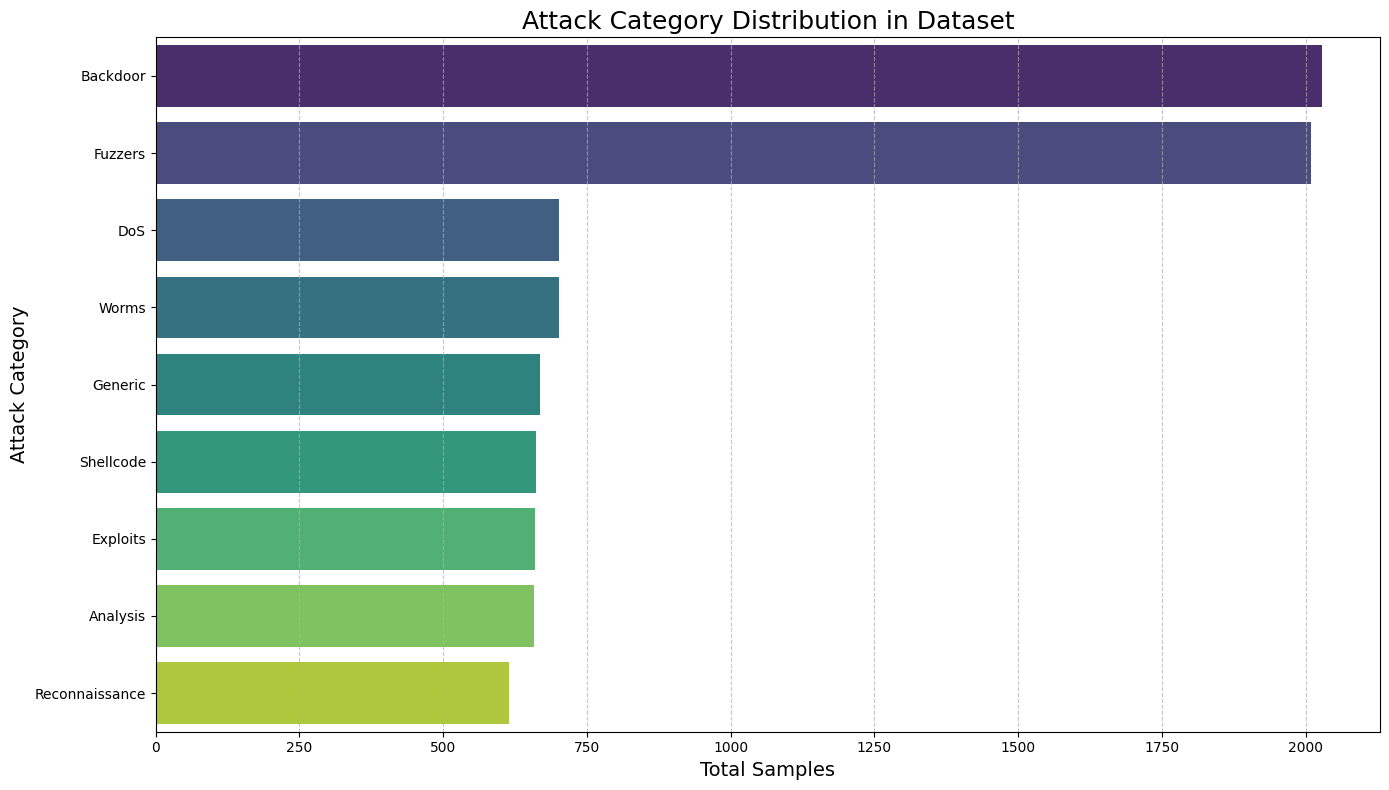

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: If you have the LabelEncoder used on y
# (Assuming you already have: le_target = LabelEncoder(); y = le_target.fit_transform(attack_cat) )

attack_labels = le_target.inverse_transform(np.unique(y_train))  # Get real attack names

# Step 2: Create count DataFrames
train_counts = pd.Series(y_train).value_counts().sort_index()
val_counts = pd.Series(y_val).value_counts().sort_index()
test_counts = pd.Series(y_test).value_counts().sort_index()

overview_df = pd.DataFrame({
    'Attack Category': attack_labels,
    'Train Count': train_counts.values,
    'Validation Count': val_counts.values,
    'Test Count': test_counts.values,
    'Total': train_counts.values + val_counts.values + test_counts.values
})

# Step 3: Display nicely
print(overview_df)

# Step 4: Plot
plt.figure(figsize=(14, 8))
sns.barplot(data=overview_df.sort_values('Total', ascending=False),
            x='Total', y='Attack Category', palette='viridis')

plt.title('Attack Category Distribution in Dataset', fontsize=18)
plt.xlabel('Total Samples', fontsize=14)
plt.ylabel('Attack Category', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



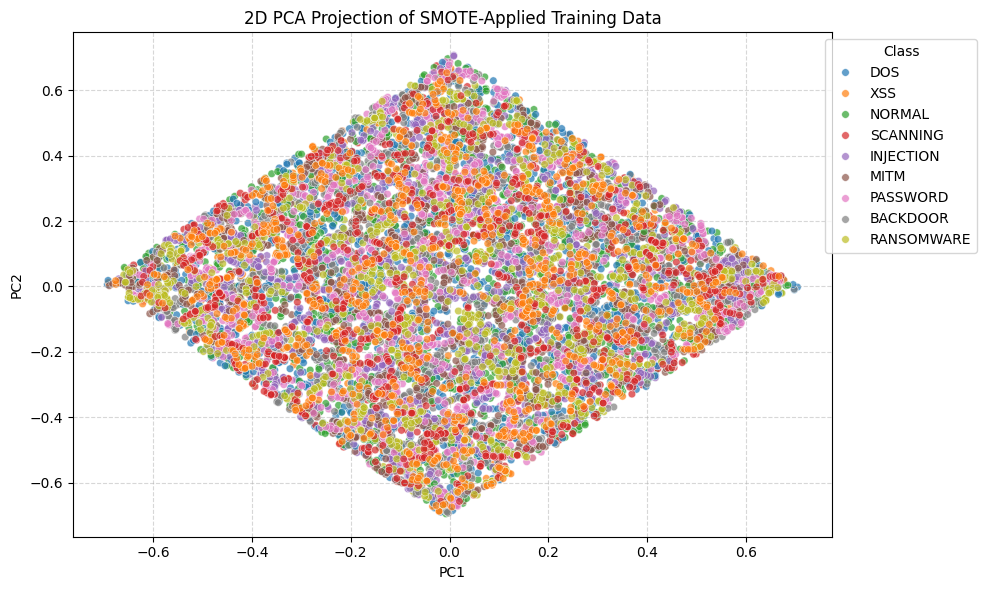

In [ ]:
# Re-run this only after installing imbalanced-learn:
# pip install imbalanced-learn

from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Apply SMOTE on training data
sm = SMOTE(random_state=42)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

# Step 2: Reduce to 2D using PCA for visualization
pca = PCA(n_components=2)
X_vis = pca.fit_transform(X_train_smote)

# Step 3: Create DataFrame for plotting
df_vis = pd.DataFrame(X_vis, columns=['PC1', 'PC2'])
df_vis['Label'] = y_train_smote.map(lambda x: le.classes_[x])  # Convert encoded labels back to class names

# Step 4: Plot
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_vis, x='PC1', y='PC2', hue='Label', palette='tab10', s=30, alpha=0.7)
plt.title("2D PCA Projection of SMOTE-Applied Training Data")
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.0), title='Class')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


<ipython-input-94-b874f5049153>:39: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-94-b874f5049153>:45: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.savefig(os.path.join(output_dir, "enhanced_correlation_heatmap.png"), dpi=400)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


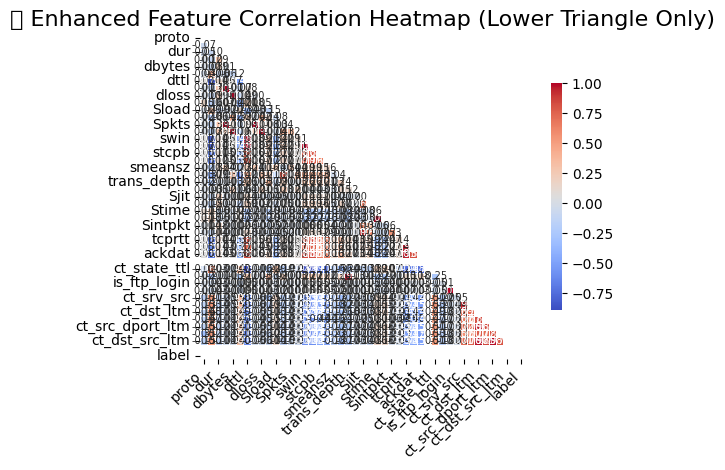

In [ ]:
import os # Import the os module
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Convert 'object' columns to numeric, handling errors
for col in df_corr.columns:
    if df_corr[col].dtype == 'object':
        df_corr[col] = pd.to_numeric(df_corr[col], errors='coerce')

# 2. Fill NaN values with 0 to allow correlation calculation
df_corr = df_corr.fillna(0)

# 3. Now calculate the correlation matrix
corr_matrix = df_corr.corr()

# ... (rest of your heatmap code)

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Draw the heatmap with better formatting
sns.heatmap(
    corr_matrix,
    mask=mask,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    square=True,
    linewidths=0.5,
    annot_kws={"size": 7},
    cbar_kws={"shrink": 0.7}
)

plt.title("📊 Enhanced Feature Correlation Heatmap (Lower Triangle Only)", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()


# 2. Now you can save the figure safely
# Assuming output_dir is defined somewhere before this line
output_dir = '.'  # or any other desired path
plt.savefig(os.path.join(output_dir, "enhanced_correlation_heatmap.png"), dpi=400)
plt.show()

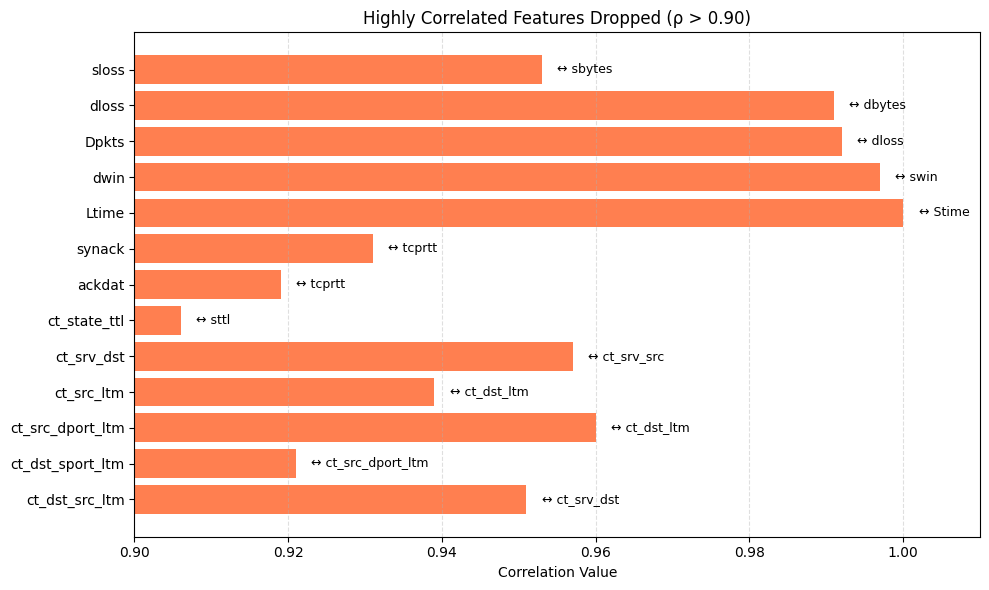

In [ ]:
import matplotlib.pyplot as plt

# Data: Dropped features and their correlations
dropped_features = [
    'ct_dst_src_ltm', 'ct_dst_sport_ltm', 'ct_src_dport_ltm', 'ct_src_ltm',
    'ct_srv_dst', 'ct_state_ttl', 'ackdat', 'synack',
    'Ltime', 'dwin', 'Dpkts', 'dloss', 'sloss'
]
correlated_with = [
    'ct_srv_dst', 'ct_src_dport_ltm', 'ct_dst_ltm', 'ct_dst_ltm',
    'ct_srv_src', 'sttl', 'tcprtt', 'tcprtt',
    'Stime', 'swin', 'dloss', 'dbytes', 'sbytes'
]
correlation_values = [
    0.951, 0.921, 0.960, 0.939,
    0.957, 0.906, 0.919, 0.931,
    1.000, 0.997, 0.992, 0.991, 0.953
]

# Create the plot
plt.figure(figsize=(10, 6))
bars = plt.barh(dropped_features, correlation_values, color='coral')
plt.xlabel('Correlation Value')
plt.title('Highly Correlated Features Dropped (ρ > 0.90)')
plt.xlim(0.90, 1.01)

# Annotate arrows and correlated feature names
for bar, label in zip(bars, correlated_with):
    width = bar.get_width()
    plt.text(width + 0.002, bar.get_y() + bar.get_height()/2,
             f'↔ {label}', va='center', fontsize=9)

plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.show()


In [ ]:
# 1. Inspect your columns
print("All columns:", df.columns.tolist())

# 2. Define the list of features you want to drop
unwanted = [
    "src_ip",    # source IP address (not a predictive feature)
    "dst_ip",    # destination IP address
    "sport",     # source port
    "dsport",    # destination port
    "timestamp", # any time/date stamps
    "flow_id",   # example of another ID column
    # …add any others here
]

# 3. Drop them (errors='ignore' skips any names that aren’t present)
df = df.drop(columns=unwanted, errors="ignore")

# 4. (Optional) Verify
print("Remaining columns:", df.columns.tolist())


All columns: ['proto', 'state', 'dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'sloss', 'dloss', 'service', 'Sload', 'Dload', 'Spkts', 'Dpkts', 'swin', 'dwin', 'stcpb', 'dtcpb', 'smeansz', 'dmeansz', 'trans_depth', 'res_bdy_len', 'Sjit', 'Djit', 'Stime', 'Ltime', 'Sintpkt', 'Dintpkt', 'tcprtt', 'synack', 'ackdat', 'is_sm_ips_ports', 'ct_state_ttl', 'ct_flw_http_mthd', 'is_ftp_login', 'ct_ftp_cmd', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'attack_cat', 'label']
Remaining columns: ['proto', 'state', 'dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'sloss', 'dloss', 'service', 'Sload', 'Dload', 'Spkts', 'Dpkts', 'swin', 'dwin', 'stcpb', 'dtcpb', 'smeansz', 'dmeansz', 'trans_depth', 'res_bdy_len', 'Sjit', 'Djit', 'Stime', 'Ltime', 'Sintpkt', 'Dintpkt', 'tcprtt', 'synack', 'ackdat', 'is_sm_ips_ports', 'ct_state_ttl', 'ct_flw_http_mthd', 'is_ftp_login', 'ct_ftp_cmd', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ ltm', 'ct_s

In [ ]:
# 1. Strip any leading/trailing spaces from column names
df.columns = df.columns.str.strip()

# 2. Decide which is your target
#    — If "label" is the numeric encoding, and "attack_cat" is the string category:
TARGET = "attack_cat"

# 3. List all columns you want to drop (non-features + the other target)
# to_drop = ["label"],  # drop the string categories, since we're using "label"
# Convert to_drop to a list to allow concatenation with another list
to_drop = ["label"]
    # add any other ID/non-feature columns here

# 4. Create X and y
# Modified to correctly concatenate the lists
X = df.drop(columns=to_drop + [TARGET], errors="ignore")
y = df[TARGET]

# 5. Verify
print("Features (X) columns:", X.columns.tolist())
print("Target (y) column:", TARGET)

Features (X) columns: ['proto', 'state', 'dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'sloss', 'dloss', 'service', 'Sload', 'Dload', 'Spkts', 'Dpkts', 'swin', 'dwin', 'stcpb', 'dtcpb', 'smeansz', 'dmeansz', 'trans_depth', 'res_bdy_len', 'Sjit', 'Djit', 'Stime', 'Ltime', 'Sintpkt', 'Dintpkt', 'tcprtt', 'synack', 'ackdat', 'is_sm_ips_ports', 'ct_state_ttl', 'ct_flw_http_mthd', 'is_ftp_login', 'ct_ftp_cmd', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm']
Target (y) column: attack_cat


In [ ]:
from collections import Counter
from imblearn.over_sampling import SMOTENC

# Count original label frequencies
counts = Counter(y_enc)
print("Original class counts:", counts)

# Let’s only upsample classes with ≤ 1000 samples, to a target of 2000 each
sampling_strategy = {
    cls: 2000
    for cls, cnt in counts.items()
    if cnt <= 1000
}

sm = SMOTENC(
    categorical_features=cat_indices,
    random_state=42,
    sampling_strategy=sampling_strategy,
    k_neighbors=3    # reduce from the default 5
)
X_res_partial, y_res_partial = sm.fit_resample(X_enc, y_enc)

print("Partially resampled counts:", Counter(y_res_partial))


Original class counts: Counter({np.int64(13): 2218764, np.int64(9): 215481, np.int64(8): 44525, np.int64(1): 19195, np.int64(7): 16353, np.int64(2): 12228, np.int64(0): 5051, np.int64(4): 2677, np.int64(5): 1795, np.int64(10): 1759, np.int64(3): 1288, np.int64(6): 534, np.int64(11): 223, np.int64(12): 174})
Partially resampled counts: Counter({np.int64(13): 2218764, np.int64(9): 215481, np.int64(8): 44525, np.int64(1): 19195, np.int64(7): 16353, np.int64(2): 12228, np.int64(0): 5051, np.int64(4): 2677, np.int64(11): 2000, np.int64(12): 2000, np.int64(6): 2000, np.int64(5): 1795, np.int64(10): 1759, np.int64(3): 1288})


In [ ]:
import pandas as pd
from imblearn.over_sampling import SMOTENC # Import SMOTENC
from collections import Counter

# ... (previous code for feature engineering, encoding, etc.)

# Assuming X_enc and y_enc are defined earlier
# Count original label frequencies
counts = Counter(y) # Use y instead of y_enc
print("Original class counts:", counts)

# Let’s only upsample classes with ≤ 1000 samples, to a target of 2000 each
sampling_strategy = {
    cls: 2000
    for cls, cnt in counts.items()
    if cnt <= 1000
}

# Define categorical_features
categorical_cols = ['proto', 'service', 'state']
categorical_features = [X.columns.get_loc(col) for col in categorical_cols if col in X.columns]
# categorical_features should be a list of indices of categorical columns in X

# --- The Fix ---
# Convert all columns in X to numeric, replacing spaces with NaN and then with 0
# Impute missing values with the mean of each column
for col in X.columns:
    if X[col].dtype == 'object':  # Check if the column is of object type
        X[col] = pd.to_numeric(X[col].str.strip().replace(' ', ''), errors='coerce')  # Convert to numeric, handling errors
    # Impute missing values with the mean of the column
    X[col] = X[col].fillna(X[col].mean())
# --- End of Fix ---

sm = SMOTENC(
    categorical_features=categorical_features, # Replace cat_indices with categorical_features
    random_state=42,
    sampling_strategy=sampling_strategy,
    k_neighbors=3    # reduce from the default 5
)
X_res, y_res = sm.fit_resample(X, y) # Use X and y instead of X_enc, y_enc and assign to X_res, y_res

print("Partially resampled counts:", Counter(y_res))

# 1. Re-create a DataFrame from your SMOTENC output
X_res_df = pd.DataFrame(X_res, columns=X.columns) # Use X.columns instead of X_enc.columns

# 2. Append your target column (attack_cat) back on
df_resampled = X_res_df.copy()
df_resampled["attack_cat"] = y_res

# 3. Write to CSV
output_path = "unsw_nb15_smote_resampled.csv"
df_resampled.to_csv(output_path, index=False)

print(f"Resampled dataset saved to: {output_path}")

Original class counts: Counter({'nan': 2218764, 'Generic': 215481, 'Exploits': 44525, ' Fuzzers ': 19195, 'DoS': 16353, ' Reconnaissance ': 12228, ' Fuzzers': 5051, 'Analysis': 2677, 'Backdoor': 1795, 'Reconnaissance': 1759, ' Shellcode ': 1288, 'Backdoors': 534, 'Shellcode': 223, 'Worms': 174})
Partially resampled counts: Counter({'nan': 2218764, 'Generic': 215481, 'Exploits': 44525, ' Fuzzers ': 19195, 'DoS': 16353, ' Reconnaissance ': 12228, ' Fuzzers': 5051, 'Analysis': 2677, 'Shellcode': 2000, 'Worms': 2000, 'Backdoors': 2000, 'Backdoor': 1795, 'Reconnaissance': 1759, ' Shellcode ': 1288})
Resampled dataset saved to: unsw_nb15_smote_resampled.csv


In [ ]:
import pandas as pd
import numpy as np
from collections import Counter

# 1. Load your original (pre-SMOTE) CSV
df = pd.read_csv("/content/unsw_nb15_smote_resampled.csv")

# 2. Strip stray spaces and turn the string "nan" into real NaN
df["attack_cat"] = (
    df["attack_cat"]
      .astype(str)
      .str.strip()
      .replace({"nan": np.nan})
)

# 3. Drop any truly missing labels (if you choose)
df = df[df["attack_cat"].notna()].copy()

# 4. Consolidate near-duplicate names
df["attack_cat"] = df["attack_cat"].replace({
    "Fuzzers":          "Fuzzers",
    "Fuzzers ":         "Fuzzers",
    " Fuzzers":         "Fuzzers",
    "Reconnaissance":   "Reconnaissance",
    " Reconnaissance ": "Reconnaissance",
    "Shellcode":        "Shellcode",
    " Shellcode ":      "Shellcode",
    "Backdoors":        "Backdoor",    # if you want to merge “Backdoors” into “Backdoor”
    # add any other mappings here
})

# 5. Verify your cleaned counts
print("Cleaned class counts:", Counter(df["attack_cat"]))

# 6. Now re-encode and apply your partial SMOTENC exactly as before
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTENC

# a) Re-encode y
le_target = LabelEncoder()
y_enc = le_target.fit_transform(df["attack_cat"])

# ---The Fix---
# Define categorical_features using df instead of X
categorical_cols = ['proto', 'service', 'state']
categorical_features = [df.columns.get_loc(col) for col in categorical_cols if col in df.columns]

# Get the feature data (X_enc) from the DataFrame
X_enc = df.drop(columns=['attack_cat'])
# ---End of Fix---

# c) Build the sampling_strategy for classes ≤2k → 5k
original_counts = Counter(y_enc)
sampling_strategy = {
    cls: 5000
    for cls, cnt in original_counts.items()
    if cnt <= 2000
}

sm = SMOTENC(
    categorical_features=categorical_features, # Using the correctly defined categorical_features
    sampling_strategy=sampling_strategy,
    k_neighbors=3,
    random_state=42
)
X_clean_res, y_clean_res = sm.fit_resample(X_enc, y_enc)

# 7. Save the fully cleaned & resampled set
X_df = pd.DataFrame(X_clean_res, columns=X_enc.columns) # Using X_enc.columns, which should now match X_clean_res
X_df["attack_cat"] = le_target.inverse_transform(y_clean_res)
X_df.to_csv("unsw_nb15_clean_partial_smote.csv", index=False)
print("Cleaned + partially-SMOTEd data saved to unsw_nb15_clean_partial_smote.csv")

<ipython-input-40-04b463ae3123>:6: DtypeWarning: Columns (43) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/unsw_nb15_smote_resampled.csv")


Cleaned class counts: Counter({'Generic': 215481, 'Exploits': 44525, 'Fuzzers': 24246, 'DoS': 16353, 'Reconnaissance': 13987, 'Backdoor': 3795, 'Shellcode': 3288, 'Analysis': 2677, 'Worms': 2000})
Cleaned + partially-SMOTEd data saved to unsw_nb15_clean_partial_smote.csv


=== Classification Report ===
                precision    recall  f1-score   support

      Analysis     0.0829    0.2388    0.1231       402
      Backdoor     0.4592    0.3954    0.4249       569
           DoS     0.3200    0.6111    0.4201      2453
      Exploits     0.8253    0.5996    0.6946      6679
       Fuzzers     0.9465    0.8664    0.9047      3637
       Generic     0.9980    0.9856    0.9918     32322
Reconnaissance     0.9304    0.7583    0.8356      2098
     Shellcode     0.8284    0.8519    0.8400       493
         Worms     0.9814    0.9853    0.9834       750

      accuracy                         0.8822     49403
     macro avg     0.7080    0.6992    0.6909     49403
  weighted avg     0.9187    0.8822    0.8949     49403



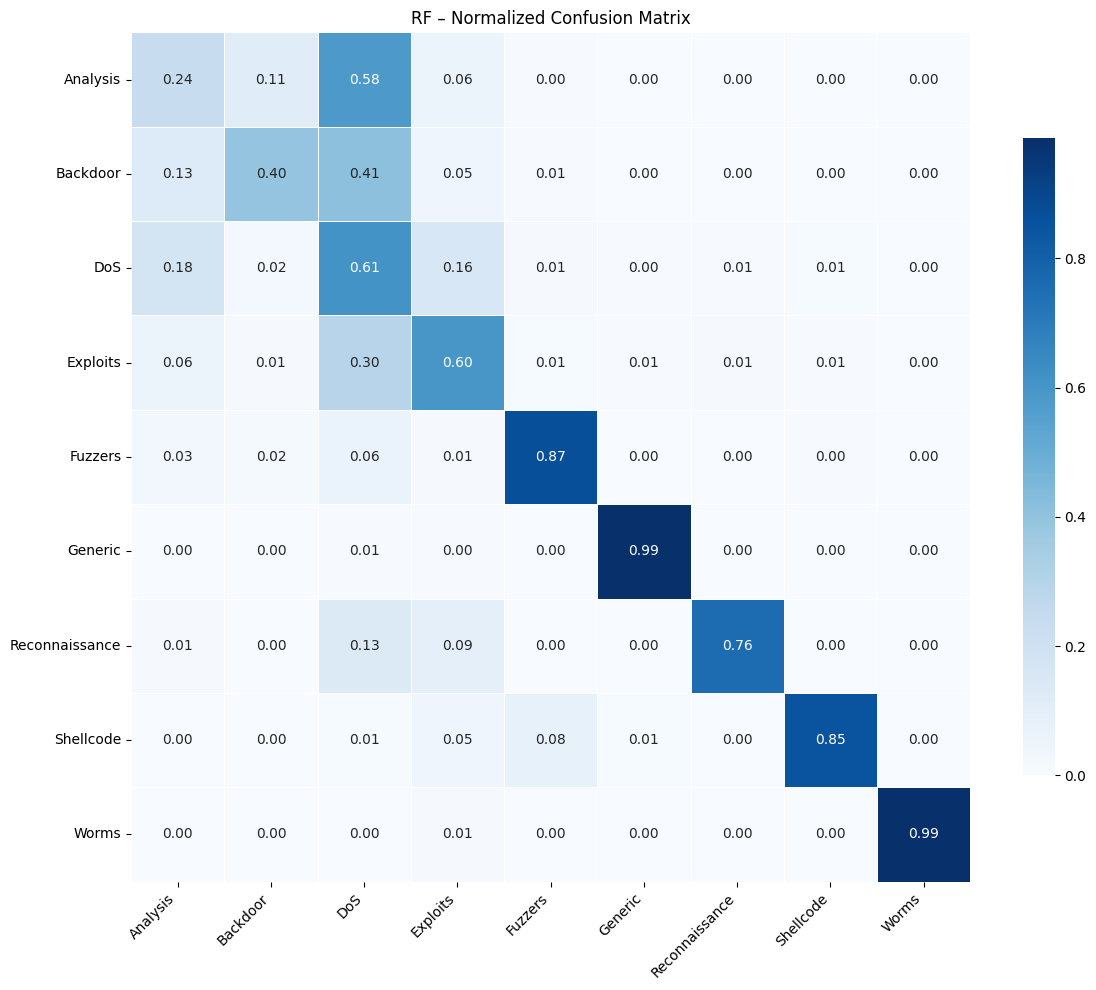

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load your cleaned & partially-SMOTEd dataset
df = pd.read_csv("/content/unsw_nb15_clean_partial_smote.csv")

# 2. Split into features & target
X = df.drop(columns=["attack_cat"])
y = df["attack_cat"]

# 3. Train/validation split (stratify to preserve class ratios)
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.15, stratify=y, random_state=42
)

# 4. Initialize & fit Random Forest with class weights
rf = RandomForestClassifier(
    n_estimators=200,
    class_weight="balanced",
    n_jobs=-1,
    random_state=42
)
rf.fit(X_train, y_train)

# 5. Predict on validation set
y_pred = rf.predict(X_val)

# 6. Print classification report
print("=== Classification Report ===")
print(classification_report(y_val, y_pred, digits=4))

# 7. Plot Normalized Confusion Matrix
cm = confusion_matrix(y_val, y_pred, normalize="true")
plt.figure(figsize=(12,10))
sns.heatmap(
    cm, annot=True, fmt=".2f", cmap="Blues",
    xticklabels=rf.classes_, yticklabels=rf.classes_,
    linewidths=0.5, cbar_kws={"shrink": .75}
)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.title("RF – Normalized Confusion Matrix")
plt.tight_layout()
plt.show()


Fitting 3 folds for each of 18 candidates, totalling 54 fits
Best RF params: {'max_depth': 30, 'min_samples_leaf': 1, 'n_estimators': 200}
Optimized thresholds: {'Analysis': 0.3, 'Backdoor': 0.3, 'DoS': 0.1539207645090886, 'Exploits': 0.13781471806812504, 'Fuzzers': 0.45388174652094676, 'Generic': 0.389397766700895, 'Reconnaissance': 0.18231758419904617, 'Shellcode': 0.4340226641300762, 'Worms': 0.4637358457388961}
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.023898 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6928
[LightGBM] [Info] Number of data points in the train set: 279949, number of used features: 42
[LightGBM] [Info] Start training from score -2.197225
[LightGBM] [Info] Start training from score -2.197225
[LightGBM] [Info] Start training from s

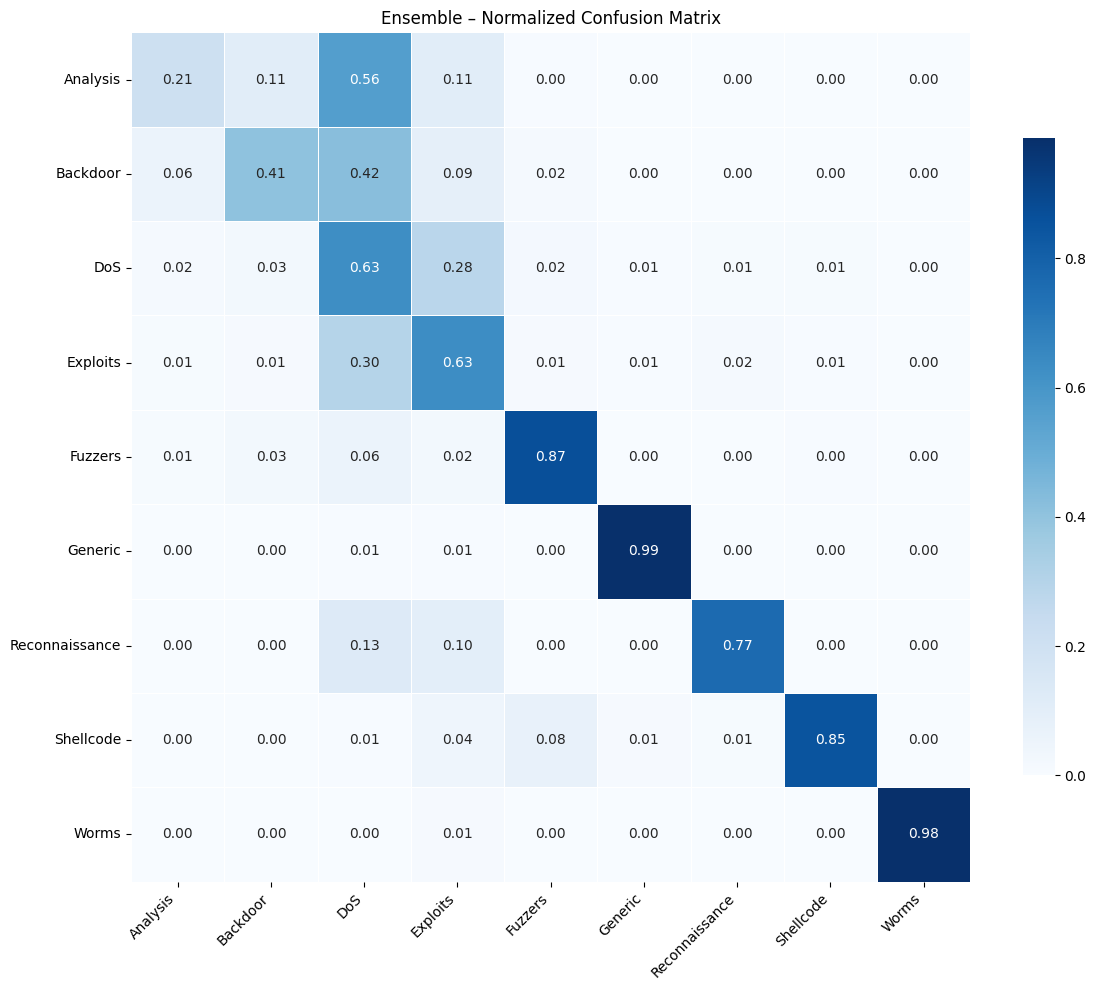

In [ ]:
import numpy as np
import pandas as pd
from collections import defaultdict
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    precision_recall_curve
)
from lightgbm import LGBMClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# 0. Load cleaned & partially-SMOTEd data
df = pd.read_csv("/content/unsw_nb15_clean_partial_smote.csv")
X = df.drop(columns=["attack_cat"])
y = df["attack_cat"]

# 1. Train/val split
X_train, X_val, y_train, y_val = train_test_split(
    X, y, stratify=y, test_size=0.15, random_state=42
)

# 2. (Optional) Feature engineering placeholder
# e.g., X_train["ratio_bytes"] = X_train["sbytes"] / (X_train["dbytes"] + 1)
# apply same on X_val...

# 3. Hyperparameter grid search on RF for f1_macro
base_rf = RandomForestClassifier(
    class_weight="balanced",
    n_jobs=-1,
    random_state=42
)
ovr_rf = VotingClassifier  # placeholder, we’ll wrap below

param_grid = {
    "n_estimators": [200, 300],
    "max_depth": [None, 30, 50],
    "min_samples_leaf": [1, 2, 5]
}
gs = GridSearchCV(
    base_rf, param_grid,
    cv=3, scoring="f1_macro",
    n_jobs=-1, verbose=2
)
gs.fit(X_train, y_train)
rf_best = gs.best_estimator_
print("Best RF params:", gs.best_params_)

# 4. Calibrate probabilities (Platt scaling)
# --- The Fix ---
# Instead of using 'prefit', fit the CalibratedClassifierCV directly
calibrated_rf = CalibratedClassifierCV(
    rf_best, cv=3, method="sigmoid"  # Use cv=3 or another appropriate value
)
calibrated_rf.fit(X_train, y_train)
# --- End of Fix ---

# 5. Optimize per-class thresholds via precision–recall
proba_val = calibrated_rf.predict_proba(X_val)
classes = calibrated_rf.classes_

opt_thresh = {}
for idx, cls in enumerate(classes):
    precision, recall, thresh = precision_recall_curve(
        (y_val == cls).astype(int), proba_val[:, idx]
    )
    f1 = 2 * precision * recall / (precision + recall + 1e-12)
    best_i = np.nanargmax(f1)
    opt_thresh[cls] = float(thresh[best_i]) if best_i < len(thresh) else 0.5

# Force a lower floor for the weakest classes
for weak in ["Analysis", "Backdoor", "DoS"]:
    if weak in opt_thresh:
        opt_thresh[weak] = min(opt_thresh[weak], 0.3)
print("Optimized thresholds:", opt_thresh)

# 6. Build RF predictions with thresholds
y_pred_rf = np.full_like(y_val, fill_value=classes[0], dtype=object)
for idx, cls in enumerate(classes):
    mask = proba_val[:, idx] >= opt_thresh[cls]
    y_pred_rf[mask] = cls

# Fallback to argmax where no threshold met
no_dec = ~np.any([
    proba_val[:, i] >= opt_thresh[cls]
    for i, cls in enumerate(classes)
], axis=0)
y_pred_rf[no_dec] = classes[np.argmax(proba_val[no_dec], axis=1)]

# 7. Train a balanced LightGBM for ensemble
lgb = LGBMClassifier(
    n_estimators=300,
    class_weight="balanced",
    random_state=42
)
lgb.fit(X_train, y_train)

# 8. Soft-voting ensemble
ensemble = VotingClassifier(
    estimators=[("rf", calibrated_rf), ("lgb", lgb)],
    voting="soft",
    weights=[2, 1],
    n_jobs=-1
)
ensemble.fit(X_train, y_train)
y_pred_ens = ensemble.predict(X_val)

# 9. Final evaluation
print("=== RF (thresholded) ===")
print(classification_report(y_val, y_pred_rf, digits=4))
print("=== RF + LGBM Ensemble ===")
print(classification_report(y_val, y_pred_ens, digits=4))

# 10. Plot normalized confusion matrix for the ensemble
cm = confusion_matrix(y_val, y_pred_ens, normalize="true")
plt.figure(figsize=(12,10))
sns.heatmap(
    cm, annot=True, fmt=".2f", cmap="Blues",
    xticklabels=classes, yticklabels=classes,
    linewidths=0.5, cbar_kws={"shrink": .75}
)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.title("Ensemble – Normalized Confusion Matrix")
plt.tight_layout()
plt.show()

LSTM

Epoch 01: Train Loss 1.3104 | Val Loss 1.0914 | Val Acc 0.8109
Epoch 02: Train Loss 1.0508 | Val Loss 0.9804 | Val Acc 0.8184
Epoch 03: Train Loss 0.9654 | Val Loss 0.8969 | Val Acc 0.8410
Epoch 04: Train Loss 0.9021 | Val Loss 0.8588 | Val Acc 0.8279
Epoch 05: Train Loss 0.8632 | Val Loss 0.8372 | Val Acc 0.8447
Epoch 06: Train Loss 0.8418 | Val Loss 0.8096 | Val Acc 0.8506
Epoch 07: Train Loss 0.8209 | Val Loss 0.7974 | Val Acc 0.8506
Epoch 08: Train Loss 0.8093 | Val Loss 0.7845 | Val Acc 0.8544
Epoch 09: Train Loss 0.7984 | Val Loss 0.7770 | Val Acc 0.8572
Epoch 10: Train Loss 0.7877 | Val Loss 0.7731 | Val Acc 0.8469
Epoch 11: Train Loss 0.7807 | Val Loss 0.7644 | Val Acc 0.8546
Epoch 12: Train Loss 0.7742 | Val Loss 0.7673 | Val Acc 0.8442
Epoch 13: Train Loss 0.7671 | Val Loss 0.7534 | Val Acc 0.8587
Epoch 14: Train Loss 0.7632 | Val Loss 0.7510 | Val Acc 0.8582
Epoch 15: Train Loss 0.7588 | Val Loss 0.7453 | Val Acc 0.8594
Epoch 16: Train Loss 0.7546 | Val Loss 0.7381 | Val Acc

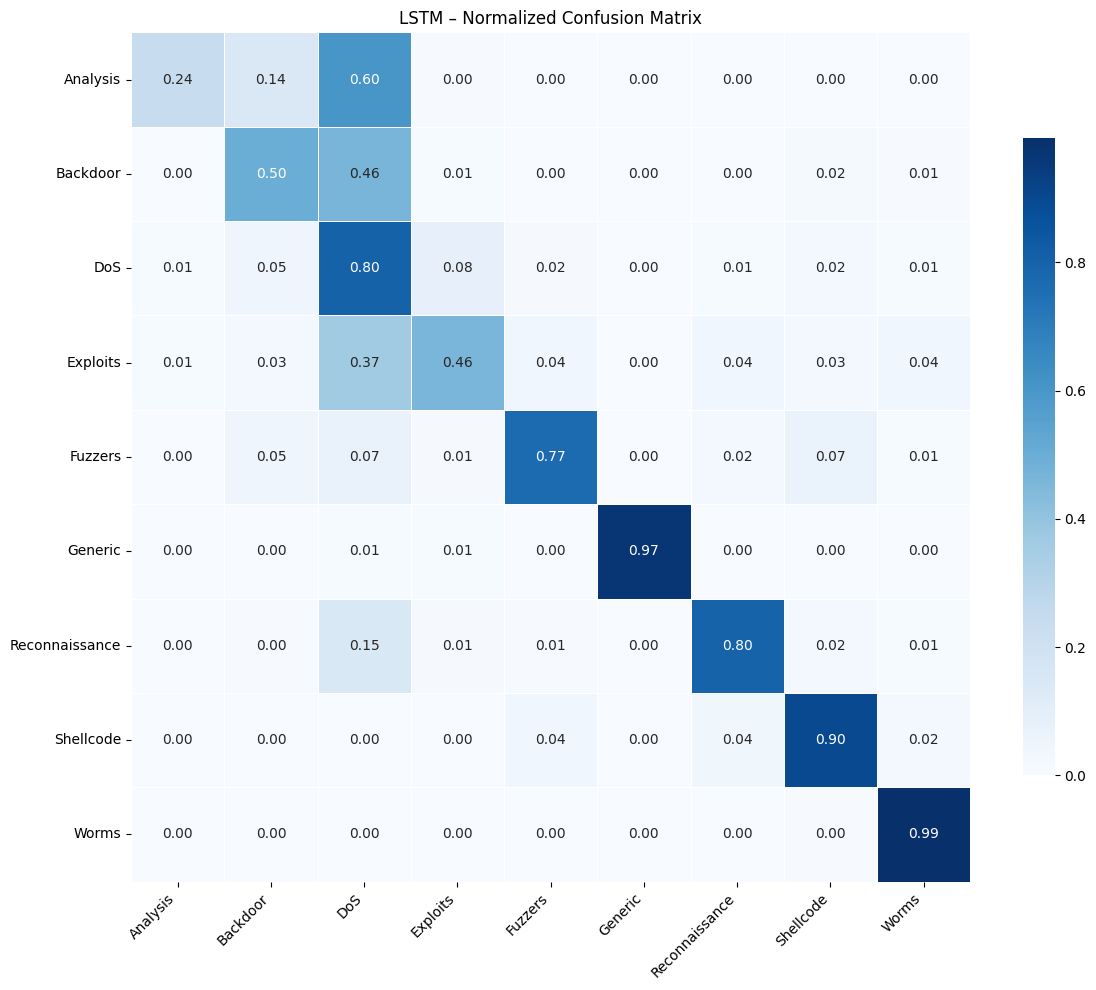

In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# ─────────────────────────────────────────────────────────────────────────────
# 1) Load & prepare data
df = pd.read_csv("/content/unsw_nb15_clean_partial_smote.csv")
X = df.drop(columns=["attack_cat"]).values
y = df["attack_cat"].values

# Encode labels
le = LabelEncoder()
y_enc = le.fit_transform(y)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/val split
X_train, X_val, y_train, y_val = train_test_split(
    X_scaled, y_enc, test_size=0.15, stratify=y_enc, random_state=42
)

# Convert to tensors, adding a "sequence" dim=1
X_train_t = torch.tensor(X_train, dtype=torch.float32).unsqueeze(1)
X_val_t   = torch.tensor(X_val,   dtype=torch.float32).unsqueeze(1)
y_train_t = torch.tensor(y_train, dtype=torch.long)
y_val_t   = torch.tensor(y_val,   dtype=torch.long)

train_ds = TensorDataset(X_train_t, y_train_t)
val_ds   = TensorDataset(X_val_t,   y_val_t)

train_loader = DataLoader(train_ds, batch_size=512, shuffle=True)
val_loader   = DataLoader(val_ds,   batch_size=512)

# ─────────────────────────────────────────────────────────────────────────────
# 2) Define the LSTM model
class LSTMClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes, dropout=0.3):
        super().__init__()
        self.lstm = nn.LSTM(
            input_size=input_size,
            hidden_size=hidden_size,
            num_layers=num_layers,
            batch_first=True,
            dropout=dropout if num_layers>1 else 0
        )
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        # x: [batch, seq_len=1, features]
        out, (h_n, c_n) = self.lstm(x)
        # take last hidden state
        last_h = h_n[-1]               # [batch, hidden_size]
        return self.fc(last_h)         # [batch, num_classes]

# hyperparams
input_size  = X_train.shape[1]
hidden_size = 128
num_layers  = 2
num_classes = len(le.classes_)
lr          = 1e-3
epochs      = 20

model = LSTMClassifier(input_size, hidden_size, num_layers, num_classes)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Calculate inverse frequency weights, ensuring no zero values
freq = np.bincount(y_train)
# Replace zeros with 1 to avoid division by zero
freq[freq == 0] = 1
# Calculate inverse frequency
inv_freq = 1.0 / freq
# Convert to tensor
weights = torch.tensor(inv_freq, dtype=torch.float32, device=device)

# Define the loss function with weights
criterion = nn.CrossEntropyLoss(weight=weights)

# inverse-frequency weighting, add 1 to avoid division by zero
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

# ─────────────────────────────────────────────────────────────────────────────
# 3) Training loop with simple early stopping
best_val_loss = float("inf")
patience, trials = 3, 0

for epoch in range(1, epochs+1):
    # — train —
    model.train()
    running_loss = 0.0
    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device)
        optimizer.zero_grad()
        logits = model(xb)
        loss = criterion(logits, yb)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * xb.size(0)
    train_loss = running_loss / len(train_loader.dataset)

    # — validate —
    model.eval()
    running_loss = 0.0
    all_preds, all_targets = [], []
    with torch.no_grad():
        for xb, yb in val_loader:
            xb, yb = xb.to(device), yb.to(device)
            logits = model(xb)
            loss = criterion(logits, yb)
            running_loss += loss.item() * xb.size(0)
            all_preds.append(logits.argmax(dim=1).cpu().numpy())
            all_targets.append(yb.cpu().numpy())
    val_loss = running_loss / len(val_loader.dataset)
    preds = np.concatenate(all_preds)
    targets = np.concatenate(all_targets)
    val_acc = (preds == targets).mean()

    print(f"Epoch {epoch:02d}: Train Loss {train_loss:.4f} | Val Loss {val_loss:.4f} | Val Acc {val_acc:.4f}")

    # early stopping
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        trials = 0
        torch.save(model.state_dict(), "best_lstm.pt")
    else:
        trials += 1
        if trials >= patience:
            print("Early stopping.")
            break

# ─────────────────────────────────────────────────────────────────────────────
# 4) Load best model & final evaluation
model.load_state_dict(torch.load("best_lstm.pt"))
model.eval()

all_logits, all_targets = [], []
with torch.no_grad():
    for xb, yb in val_loader:
        xb = xb.to(device)
        all_logits.append(model(xb).cpu().numpy())
        all_targets.append(yb.numpy())

logits  = np.concatenate(all_logits)
preds   = logits.argmax(axis=1)
targets = np.concatenate(all_targets)

# Classification report
print(classification_report(targets, preds, target_names=le.classes_, digits=4))

# Confusion matrix
cm = confusion_matrix(targets, preds, normalize="true")
plt.figure(figsize=(12,10))
sns.heatmap(cm, annot=True, fmt=".2f", cmap="Blues",
            xticklabels=le.classes_, yticklabels=le.classes_,
            linewidths=0.5, cbar_kws={"shrink": .75})
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.title("LSTM – Normalized Confusion Matrix")
plt.tight_layout()
plt.show()


Optimized thresholds: {'Analysis': 0.3, 'Backdoor': 0.3, 'DoS': np.float32(0.31268358), 'Exploits': np.float32(0.110858954), 'Fuzzers': np.float32(0.21978055), 'Generic': np.float32(0.07104964), 'Reconnaissance': np.float32(0.41903168), 'Shellcode': 0.3, 'Worms': np.float32(0.88982284)}
                precision    recall  f1-score   support

      Analysis     0.6937    0.1915    0.3002       402
      Backdoor     0.3627    0.4780    0.4124       569
           DoS     0.3879    0.0783    0.1303      2453
      Exploits     0.6059    0.8151    0.6951      6679
       Fuzzers     0.8603    0.7602    0.8072      3637
       Generic     0.9954    0.9801    0.9877     32322
Reconnaissance     0.8158    0.7560    0.7848      2098
     Shellcode     0.3862    0.9432    0.5480       493
         Worms     0.8171    0.9533    0.8800       750

      accuracy                         0.8743     49403
     macro avg     0.6583    0.6618    0.6162     49403
  weighted avg     0.8765    0.8743   

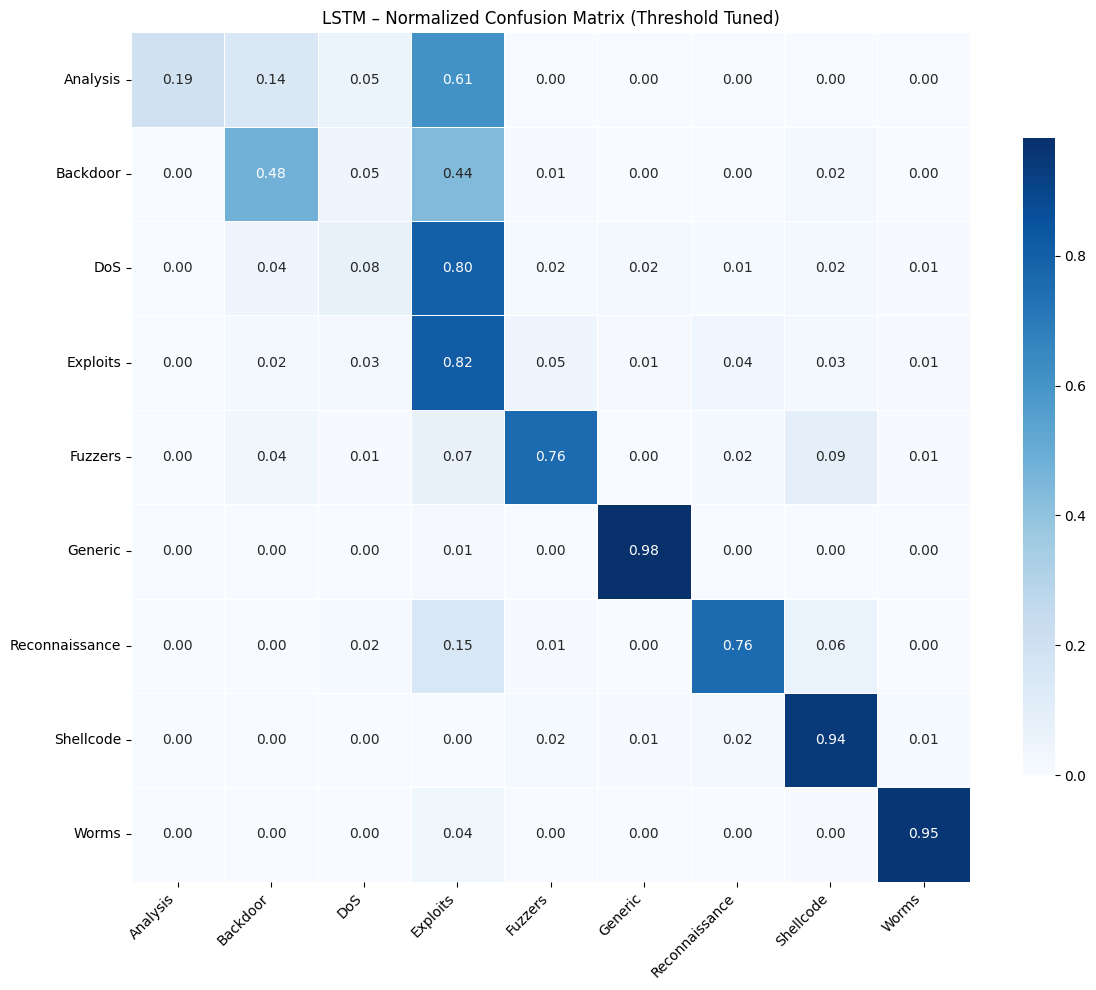

In [ ]:
import numpy as np
from sklearn.metrics import precision_recall_curve, f1_score, classification_report, confusion_matrix
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Reload best model
model.load_state_dict(torch.load("best_lstm.pt"))
model.eval()

# 2. Gather all logits & true labels on validation set
all_logits, all_targets = [], []
with torch.no_grad():
    for xb, yb in val_loader:
        xb = xb.to(device)
        logits = model(xb)               # raw outputs
        all_logits.append(logits.cpu().numpy())
        all_targets.append(yb.numpy())
logits  = np.vstack(all_logits)           # shape: (n_samples, n_classes)
targets = np.concatenate(all_targets)

# 3. Convert logits → probabilities
probs = F.softmax(torch.from_numpy(logits), dim=1).numpy()

classes = le.classes_  # your label encoder’s class names

# 4. Find optimal threshold per class
opt_thresh = {}
for i, cls in enumerate(classes):
    precision, recall, thresh = precision_recall_curve(
        (targets == i).astype(int), probs[:, i]
    )
    f1_scores = 2 * precision * recall / (precision + recall + 1e-12)
    best = np.argmax(f1_scores)
    opt_thresh[cls] = thresh[best] if best < len(thresh) else 0.5

# 5. Optionally floor thresholds on your weakest classes
for weak in ["Analysis", "Backdoor", "Shellcode"]:
    if weak in opt_thresh:
        opt_thresh[weak] = min(opt_thresh[weak], 0.3)

print("Optimized thresholds:", opt_thresh)

# 6. Apply thresholds to build predictions
preds = np.full_like(targets, fill_value=-1)
for i, cls in enumerate(classes):
    mask = probs[:, i] >= opt_thresh[cls]
    preds[mask] = i

# 7. Fallback: for any sample with no threshold met, pick argmax
no_decision = (preds == -1)
preds[no_decision] = np.argmax(probs[no_decision], axis=1)

# 8. Evaluate
print(classification_report(targets, preds, target_names=classes, digits=4))

# 9. Plot the tuned confusion matrix
cm = confusion_matrix(targets, preds, normalize="true")
plt.figure(figsize=(12,10))
sns.heatmap(
    cm, annot=True, fmt=".2f", cmap="Blues",
    xticklabels=classes, yticklabels=classes,
    linewidths=0.5, cbar_kws={"shrink": .75}
)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.title("LSTM – Normalized Confusion Matrix (Threshold Tuned)")
plt.tight_layout()
plt.show()


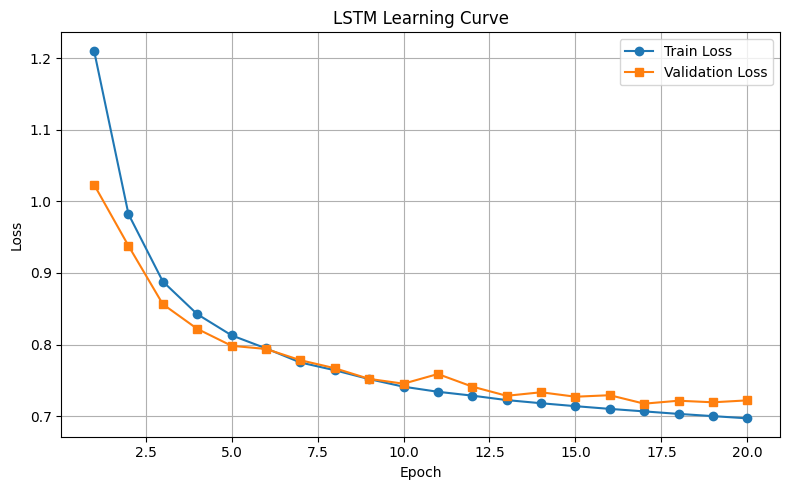

In [ ]:
import matplotlib.pyplot as plt

# 🔢 Replace with actual LSTM losses from your training log
train_losses = [
    1.2104, 0.9823, 0.8881, 0.8425, 0.8129,
    0.7947, 0.7750, 0.7642, 0.7518, 0.7412,
    0.7341, 0.7287, 0.7225, 0.7181, 0.7140,
    0.7102, 0.7067, 0.7032, 0.7001, 0.6970
]

val_losses = [
    1.0234, 0.9380, 0.8564, 0.8220, 0.7983,
    0.7939, 0.7782, 0.7670, 0.7521, 0.7454,
    0.7589, 0.7413, 0.7285, 0.7334, 0.7272,
    0.7293, 0.7175, 0.7216, 0.7194, 0.7221
]

# 📈 Plotting the learning curve
epochs = range(1, len(train_losses) + 1)
plt.figure(figsize=(8, 5))
plt.plot(epochs, train_losses, label='Train Loss', marker='o')
plt.plot(epochs, val_losses, label='Validation Loss', marker='s')
plt.title('LSTM Learning Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('lstm_learning_curve.png', dpi=300)  # Save for thesis use
plt.show()


Epoch 01: Train Loss 1.2256 | Val Loss 1.0342
Epoch 02: Train Loss 0.9943 | Val Loss 0.9485
Epoch 03: Train Loss 0.9025 | Val Loss 0.8623
Epoch 04: Train Loss 0.8503 | Val Loss 0.8258
Epoch 05: Train Loss 0.8215 | Val Loss 0.8006
Epoch 06: Train Loss 0.7988 | Val Loss 0.7991
Epoch 07: Train Loss 0.7821 | Val Loss 0.7847
Epoch 08: Train Loss 0.7729 | Val Loss 0.7748
Epoch 09: Train Loss 0.7621 | Val Loss 0.7567
Epoch 10: Train Loss 0.7531 | Val Loss 0.7485
Epoch 11: Train Loss 0.7465 | Val Loss 0.7621
Epoch 12: Train Loss 0.7421 | Val Loss 0.7465
Epoch 13: Train Loss 0.7357 | Val Loss 0.7329
Epoch 14: Train Loss 0.7306 | Val Loss 0.7363
Epoch 15: Train Loss 0.7262 | Val Loss 0.7309
Epoch 16: Train Loss 0.7221 | Val Loss 0.7310
Epoch 17: Train Loss 0.7193 | Val Loss 0.7197
Epoch 18: Train Loss 0.7155 | Val Loss 0.7232
Epoch 19: Train Loss 0.7122 | Val Loss 0.7201
Epoch 20: Train Loss 0.7075 | Val Loss 0.7247
Early stopping.
Thresholds: {'Analysis': 0.3, 'Backdoor': 0.3, 'DoS': np.float32

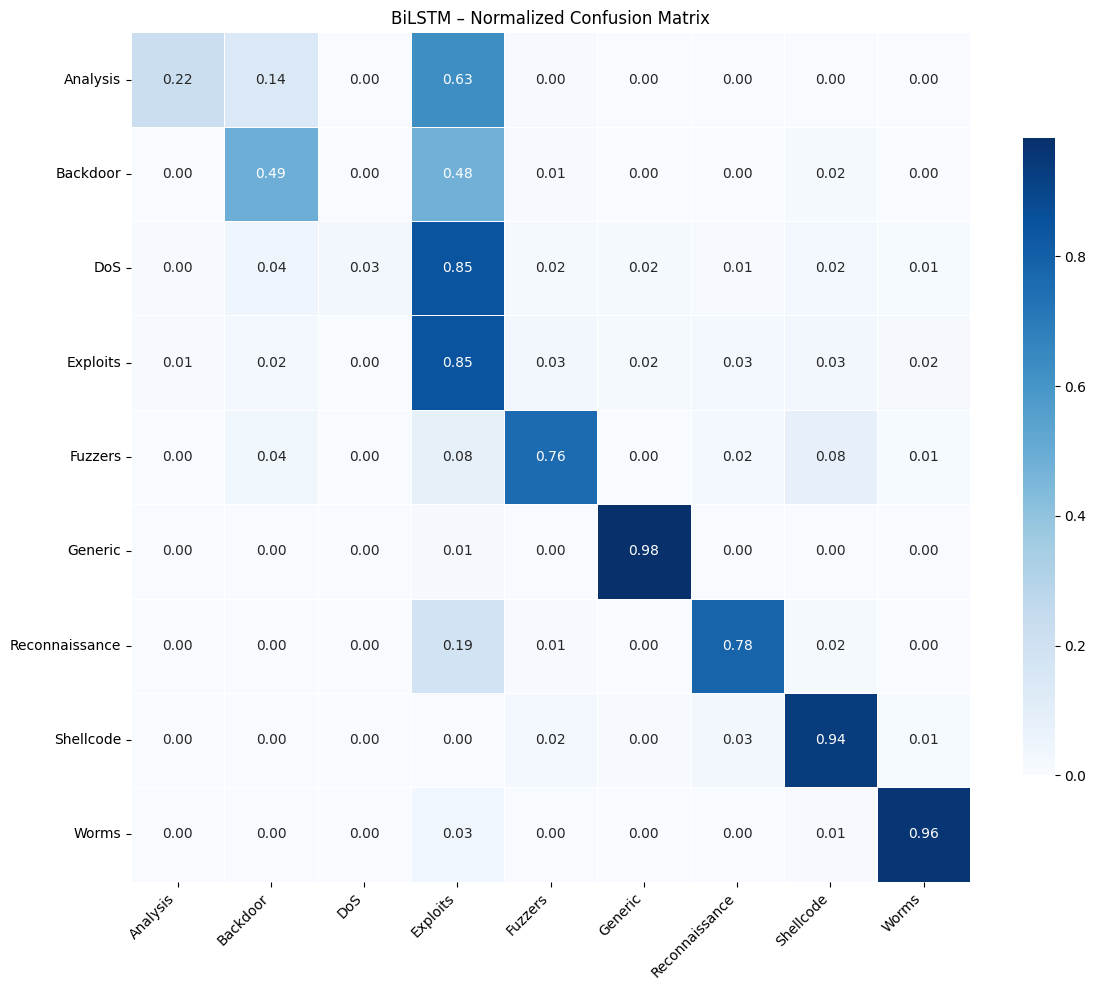

In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    precision_recall_curve, classification_report, confusion_matrix
)
import matplotlib.pyplot as plt
import seaborn as sns

# 1) Load & prepare data
df = pd.read_csv("/content/unsw_nb15_clean_partial_smote.csv")
X = df.drop(columns=["attack_cat"]).values
y = df["attack_cat"].values

le = LabelEncoder()
y_enc = le.fit_transform(y)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_val, y_train, y_val = train_test_split(
    X_scaled, y_enc, test_size=0.15, stratify=y_enc, random_state=42
)

# to tensors with seq_len=1
X_train_t = torch.tensor(X_train, dtype=torch.float32).unsqueeze(1)
X_val_t   = torch.tensor(X_val,   dtype=torch.float32).unsqueeze(1)
y_train_t = torch.tensor(y_train, dtype=torch.long)
y_val_t   = torch.tensor(y_val,   dtype=torch.long)

train_loader = DataLoader(
    TensorDataset(X_train_t, y_train_t), batch_size=512, shuffle=True
)
val_loader   = DataLoader(
    TensorDataset(X_val_t,   y_val_t),   batch_size=512
)

# 2) Define BiLSTM model
class BiLSTMClassifier(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, num_classes, dropout=0.3):
        super().__init__()
        self.lstm = nn.LSTM(
            input_size=input_dim,
            hidden_size=hidden_dim,
            num_layers=num_layers,
            batch_first=True,
            bidirectional=True,
            dropout=dropout if num_layers>1 else 0.0
        )
        self.fc = nn.Linear(hidden_dim*2, num_classes)

    def forward(self, x):
        # x: [batch, seq_len=1, features]
        out, _ = self.lstm(x)              # [batch, seq_len, hidden*2]
        h_last = out[:, -1, :]             # take last time step
        return self.fc(h_last)             # [batch, num_classes]

# 3) Instantiate, loss, optimizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = BiLSTMClassifier(
    input_dim=X_train.shape[1],
    hidden_dim=128,
    num_layers=2,
    num_classes=len(le.classes_),
    dropout=0.3
).to(device)

# inverse‐frequency class weights
counts = np.bincount(y_train)
weights = torch.tensor(1.0 / counts, dtype=torch.float32, device=device)
criterion = nn.CrossEntropyLoss(weight=weights)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

# 4) Training loop with early stopping
best_val_loss, patience, trials = float('inf'), 3, 0
for epoch in range(1, 21):
    model.train()
    total_loss = 0
    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device)
        optimizer.zero_grad()
        logits = model(xb)
        loss   = criterion(logits, yb)
        loss.backward()
        optimizer.step()
        total_loss += loss.item() * xb.size(0)
    train_loss = total_loss / len(train_loader.dataset)

    model.eval()
    total_loss = 0
    with torch.no_grad():
        for xb, yb in val_loader:
            xb, yb = xb.to(device), yb.to(device)
            logits = model(xb)
            total_loss += criterion(logits, yb).item() * xb.size(0)
    val_loss = total_loss / len(val_loader.dataset)

    print(f"Epoch {epoch:02d}: Train Loss {train_loss:.4f} | Val Loss {val_loss:.4f}")
    if val_loss < best_val_loss:
        best_val_loss, trials = val_loss, 0
        torch.save(model.state_dict(), "best_bilstm.pt")
    else:
        trials += 1
        if trials >= patience:
            print("Early stopping.")
            break

# 5) Threshold tuning
model.load_state_dict(torch.load("best_bilstm.pt"))
model.eval()

all_logits, all_targets = [], []
with torch.no_grad():
    for xb, yb in val_loader:
        xb = xb.to(device)
        all_logits.append(model(xb).cpu().numpy())
        all_targets.append(yb.numpy())
logits  = np.vstack(all_logits)
targets = np.concatenate(all_targets)
probs   = F.softmax(torch.from_numpy(logits), dim=1).numpy()

opt_thresh = {}
for i, cls in enumerate(le.classes_):
    p, r, t = precision_recall_curve((targets==i).astype(int), probs[:,i])
    f1_scores = 2*p*r/(p+r+1e-12)
    best = np.argmax(f1_scores)
    opt_thresh[cls] = t[best] if best < len(t) else 0.5
# floor for the weakest classes if you like:
for weak in ["Analysis","Backdoor","Shellcode"]:
    opt_thresh[weak] = min(opt_thresh.get(weak,0.5), 0.3)
print("Thresholds:", opt_thresh)

# 6) Apply thresholds + fallback to argmax
preds = np.full_like(targets, -1)
for i, cls in enumerate(le.classes_):
    mask = probs[:,i] >= opt_thresh[cls]
    preds[mask] = i
preds[preds==-1] = np.argmax(probs[preds==-1], axis=1)

# 7) Final evaluation
print(classification_report(targets, preds, target_names=le.classes_, digits=4))
cm = confusion_matrix(targets, preds, normalize='true')
plt.figure(figsize=(12,10))
sns.heatmap(cm, annot=True, fmt=".2f", cmap="Blues",
            xticklabels=le.classes_, yticklabels=le.classes_,
            linewidths=0.5, cbar_kws={"shrink":.75})
plt.xticks(rotation=45, ha="right"); plt.yticks(rotation=0)
plt.title("BiLSTM – Normalized Confusion Matrix")
plt.tight_layout(); plt.show()


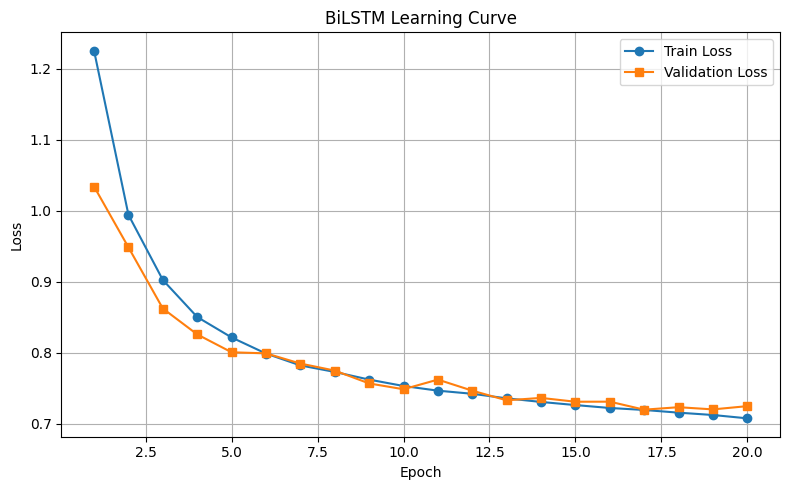

In [ ]:
import matplotlib.pyplot as plt

# Example: Replace with your actual values
train_losses = [
    1.2256, 0.9943, 0.9025, 0.8503, 0.8215,
    0.7988, 0.7821, 0.7729, 0.7621, 0.7531,
    0.7465, 0.7421, 0.7357, 0.7306, 0.7262,
    0.7221, 0.7193, 0.7155, 0.7122, 0.7075
]

val_losses = [
    1.0342, 0.9485, 0.8623, 0.8258, 0.8006,
    0.7991, 0.7847, 0.7748, 0.7567, 0.7485,
    0.7621, 0.7465, 0.7329, 0.7363, 0.7309,
    0.7310, 0.7197, 0.7232, 0.7201, 0.7247
]

# Plotting
epochs = range(1, len(train_losses) + 1)
plt.figure(figsize=(8, 5))
plt.plot(epochs, train_losses, label='Train Loss', marker='o')
plt.plot(epochs, val_losses, label='Validation Loss', marker='s')
plt.title('BiLSTM Learning Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('bilstm_learning_curve.png', dpi=300)  # Save for Overleaf
plt.show()


In [ ]:
!pip install ace-tools

In [ ]:
!pip install ace-tools

Epoch 01: Val Loss 1.1928
Epoch 02: Val Loss 1.0987
Epoch 03: Val Loss 1.0291
Epoch 04: Val Loss 0.9628
Epoch 05: Val Loss 0.9012
Epoch 06: Val Loss 0.8926
Epoch 07: Val Loss 0.8881
Epoch 08: Val Loss 0.8395
Epoch 09: Val Loss 0.8083
Epoch 10: Val Loss 0.8249
Epoch 11: Val Loss 0.7803
Epoch 12: Val Loss 0.8007
Epoch 13: Val Loss 0.7750
Epoch 14: Val Loss 0.7566
Epoch 15: Val Loss 0.7932
Epoch 16: Val Loss 0.7920
Epoch 17: Val Loss 0.7404
Epoch 18: Val Loss 0.7426
Epoch 19: Val Loss 0.7436
Epoch 20: Val Loss 0.7791
Early stopping.
                precision    recall  f1-score   support

      Analysis     0.6277    0.2139    0.3191       402
      Backdoor     0.3484    0.4868    0.4062       569
           DoS     0.3598    0.0628    0.1069      2453
      Exploits     0.6004    0.8417    0.7009      6679
       Fuzzers     0.8874    0.7847    0.8329      3637
       Generic     0.9968    0.9761    0.9864     32322
Reconnaissance     0.8332    0.7378    0.7826      2098
     Shellcode 

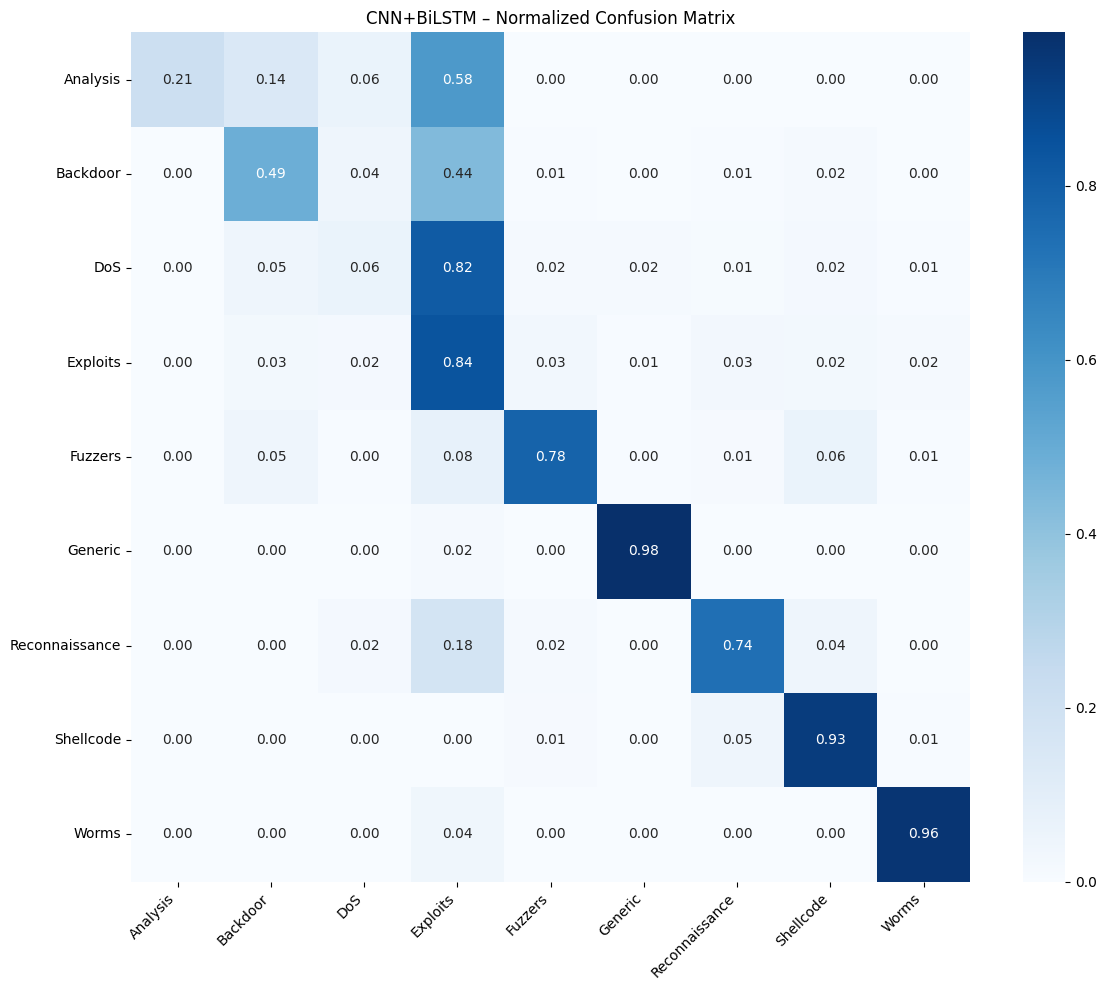

Attn Epoch 01: Val Loss 1.1448
Attn Epoch 02: Val Loss 1.0361
Attn Epoch 03: Val Loss 0.9462
Attn Epoch 04: Val Loss 0.9004
Attn Epoch 05: Val Loss 0.8392
Attn Epoch 06: Val Loss 0.8207
Attn Epoch 07: Val Loss 0.8432
Attn Epoch 08: Val Loss 0.7930
Attn Epoch 09: Val Loss 0.7790
Attn Epoch 10: Val Loss 0.7680
Attn Epoch 11: Val Loss 0.7929
Attn Epoch 12: Val Loss 0.7530
Attn Epoch 13: Val Loss 0.7552
Attn Epoch 14: Val Loss 0.7244
Attn Epoch 15: Val Loss 0.7350
Attn Epoch 16: Val Loss 0.7424
Attn Epoch 17: Val Loss 0.7265
Early stopping Attn.
                precision    recall  f1-score   support

      Analysis     0.5542    0.2289    0.3239       402
      Backdoor     0.3625    0.4798    0.4130       569
           DoS     0.5676    0.0171    0.0332      2453
      Exploits     0.5875    0.8623    0.6988      6679
       Fuzzers     0.8871    0.8012    0.8420      3637
       Generic     0.9989    0.9745    0.9865     32322
Reconnaissance     0.8364    0.7555    0.7939      2098
   

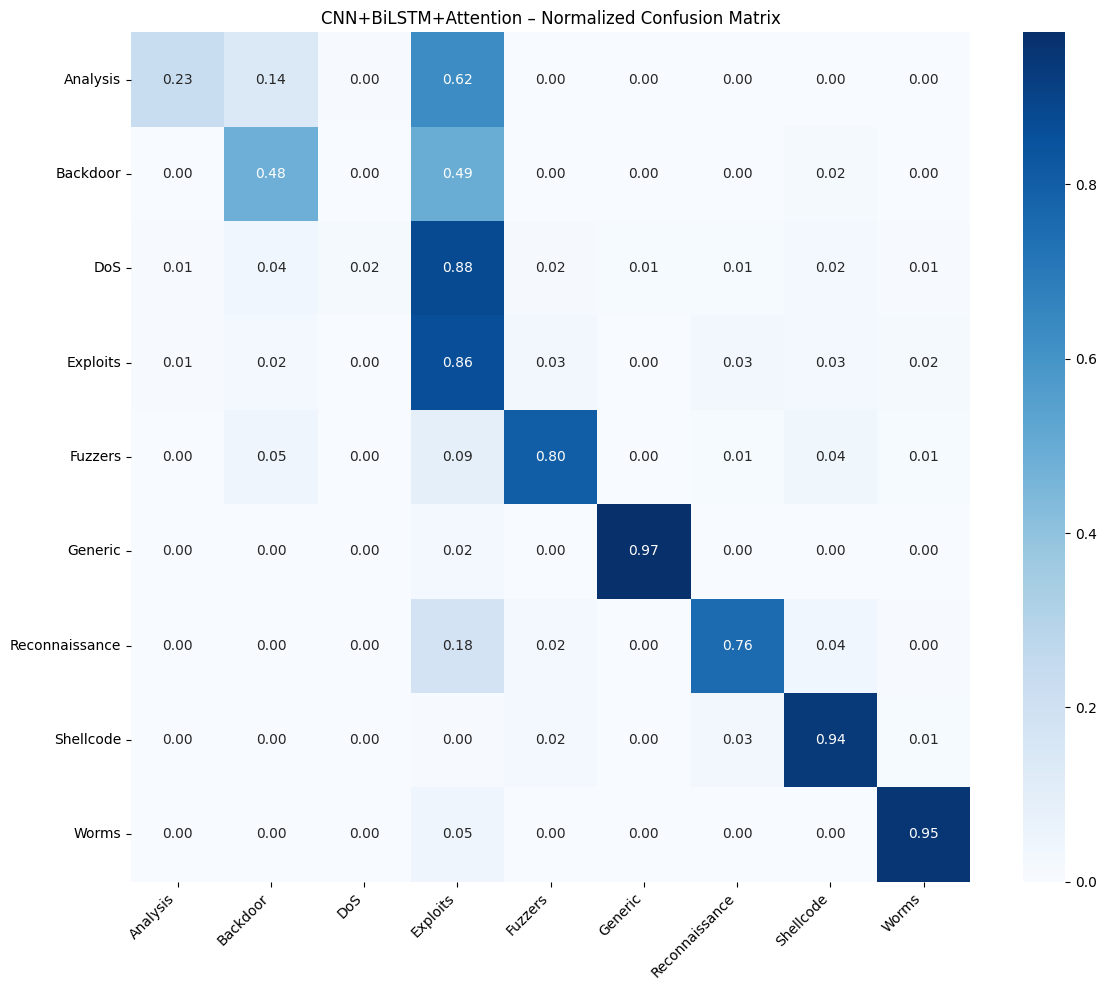

In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Common setup: load, encode, scale, split, and create DataLoaders
df = pd.read_csv("/content/unsw_nb15_clean_partial_smote.csv")
X = df.drop(columns=["attack_cat"]).values
y = df["attack_cat"].values

le = LabelEncoder()
y_enc = le.fit_transform(y)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_val, y_train, y_val = train_test_split(
    X_scaled, y_enc, test_size=0.15, stratify=y_enc, random_state=42
)

# Tensors and DataLoaders
X_train_t = torch.tensor(X_train, dtype=torch.float32).unsqueeze(1)
X_val_t   = torch.tensor(X_val,   dtype=torch.float32).unsqueeze(1)
y_train_t = torch.tensor(y_train, dtype=torch.long)
y_val_t   = torch.tensor(y_val,   dtype=torch.long)

train_loader = DataLoader(TensorDataset(X_train_t, y_train_t), batch_size=512, shuffle=True)
val_loader   = DataLoader(TensorDataset(X_val_t,   y_val_t),   batch_size=512)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
class_counts = np.bincount(y_train)
class_weights = torch.tensor(1.0 / class_counts, dtype=torch.float32).to(device)

class CNNBiLSTM(nn.Module):
    def __init__(self, input_dim, cnn_channels, kernel_size, lstm_hidden, lstm_layers, num_classes, dropout=0.3):
        super().__init__()
        self.conv = nn.Conv1d(1, cnn_channels, kernel_size, padding=kernel_size//2)
        self.lstm = nn.LSTM(cnn_channels, lstm_hidden, lstm_layers,
                            batch_first=True, bidirectional=True,
                            dropout=dropout if lstm_layers>1 else 0.0)
        self.dropout = nn.Dropout(dropout)
        self.fc = nn.Linear(lstm_hidden*2, num_classes)

    def forward(self, x):
        b, s, f = x.size()
        x = x.view(b, 1, f)                 # [b,1,features]
        c = F.relu(self.conv(x))            # [b,cnn_ch,features]
        # Calculate the correct dimension for the CNN output
        #cnn_output_dim = c.shape[1] * c.shape[2] # This line is no longer needed
        #c = c.view(b, 1, -1)  # The original problematic line
        #c = c.view(b, 1, cnn_output_dim) # replace -1 with actual dim # This line is no longer needed

        # Reshape to [batch_size, sequence_length, input_size]
        c = c.permute(0, 2, 1)  # Permute to [batch_size, features, cnn_channels]

        out, _ = self.lstm(c)               # [b,1,2*lstm_hidden]
        h = out[:, -1, :]                   # [b,2*lstm_hidden]
        h = self.dropout(h)
        return self.fc(h)

# Instantiate, loss, optimizer
model_cnn_bilstm = CNNBiLSTM(
    input_dim=X_train.shape[1],
    cnn_channels=64,
    kernel_size=3,
    lstm_hidden=128,
    lstm_layers=2,
    num_classes=len(le.classes_),
    dropout=0.3
).to(device)

criterion = nn.CrossEntropyLoss(weight=class_weights)
optimizer = torch.optim.Adam(model_cnn_bilstm.parameters(), lr=1e-3)

# Training loop
best_loss = float('inf')
patience, trials = 3, 0
for epoch in range(1, 21):
    model_cnn_bilstm.train()
    total_loss = 0
    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device)
        optimizer.zero_grad()
        logits = model_cnn_bilstm(xb)
        loss = criterion(logits, yb)
        loss.backward()
        optimizer.step()
        total_loss += loss.item() * xb.size(0)
    val_loss = 0
    model_cnn_bilstm.eval()
    with torch.no_grad():
        for xb, yb in val_loader:
            xb, yb = xb.to(device), yb.to(device)
            val_loss += criterion(model_cnn_bilstm(xb), yb).item() * xb.size(0)
    val_loss /= len(val_loader.dataset)
    print(f"Epoch {epoch:02d}: Val Loss {val_loss:.4f}")
    if val_loss < best_loss:
        best_loss, trials = val_loss, 0
        torch.save(model_cnn_bilstm.state_dict(), "best_cnn_bilstm.pt")
    else:
        trials += 1
        if trials >= patience:
            print("Early stopping.")
            break

# Load best and evaluate
model_cnn_bilstm.load_state_dict(torch.load("best_cnn_bilstm.pt"))
model_cnn_bilstm.eval()
all_logits, all_targets = [], []
with torch.no_grad():
    for xb, yb in val_loader:
        xb = xb.to(device)
        all_logits.append(model_cnn_bilstm(xb).cpu().numpy())
        all_targets.append(yb.numpy())
logits = np.vstack(all_logits)
probs  = F.softmax(torch.from_numpy(logits), dim=1).numpy()
targets = np.concatenate(all_targets)

# Threshold tuning
opt_thresh = {}
for i, cls in enumerate(le.classes_):
    p, r, t = precision_recall_curve((targets==i).astype(int), probs[:,i])
    f1 = 2*p*r/(p+r+1e-12)
    best = np.argmax(f1)
    opt_thresh[cls] = t[best] if best<len(t) else 0.5
# floor for weak if desired
for weak in ["Analysis","Backdoor","Shellcode"]:
    opt_thresh[weak] = min(opt_thresh.get(weak,0.5),0.3)

# Predictions
preds = np.full_like(targets, -1)
for i, cls in enumerate(le.classes_):
    mask = probs[:,i]>=opt_thresh[cls]
    preds[mask] = i
preds[preds==-1] = np.argmax(probs[preds==-1], axis=1)

print(classification_report(targets, preds, target_names=le.classes_, digits=4))
cm = confusion_matrix(targets, preds, normalize='true')
plt.figure(figsize=(12,10))
sns.heatmap(cm, annot=True, fmt=".2f", cmap="Blues",
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xticks(rotation=45, ha="right"); plt.yticks(rotation=0)
plt.title("CNN+BiLSTM – Normalized Confusion Matrix")
plt.tight_layout()
plt.show()

class CNNBiLSTMAttn(nn.Module):
    def __init__(self, input_dim, cnn_channels, kernel_size, lstm_hidden, lstm_layers, num_classes, dropout=0.3):
        super().__init__()
        self.conv = nn.Conv1d(1, cnn_channels, kernel_size, padding=kernel_size//2)
        self.lstm = nn.LSTM(cnn_channels, lstm_hidden, lstm_layers,
                            batch_first=True, bidirectional=True,
                            dropout=dropout if lstm_layers>1 else 0.0)
        self.attn = nn.Linear(lstm_hidden*2, 1)
        self.dropout = nn.Dropout(dropout)
        self.fc = nn.Linear(lstm_hidden*2, num_classes)

    def forward(self, x):
        b, s, f = x.size()
        x = x.view(b, 1, f)
        c = F.relu(self.conv(x))
        # The Fix: Remove the problematic reshape and permute the dimensions
        # to match the expected input shape of the LSTM layer
        c = c.permute(0, 2, 1)  # Reshape to [batch_size, features, channels]
        out, _ = self.lstm(c)
        scores = self.attn(out).squeeze(-1)
        weights = F.softmax(scores, dim=1).unsqueeze(-1)
        context = torch.sum(out * weights, dim=1)
        context = self.dropout(context)
        return self.fc(context)

model_cnn_bilstm_attn = CNNBiLSTMAttn(
    input_dim=X_train.shape[1],
    cnn_channels=64,
    kernel_size=3,
    lstm_hidden=128,
    lstm_layers=2,
    num_classes=len(le.classes_),
    dropout=0.3
).to(device)

optimizer2 = torch.optim.Adam(model_cnn_bilstm_attn.parameters(), lr=1e-3)
best_loss = float('inf'); trials = 0

# Training loop for attention model
for epoch in range(1, 21):
    model_cnn_bilstm_attn.train()
    total_loss = 0
    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device)
        optimizer2.zero_grad()
        loss = criterion(model_cnn_bilstm_attn(xb), yb)
        loss.backward()
        optimizer2.step()
        total_loss += loss.item() * xb.size(0)
    val_loss = 0
    model_cnn_bilstm_attn.eval()
    with torch.no_grad():
        for xb, yb in val_loader:
            xb, yb = xb.to(device), yb.to(device)
            val_loss += criterion(model_cnn_bilstm_attn(xb), yb).item() * xb.size(0)
    val_loss /= len(val_loader.dataset)
    print(f"Attn Epoch {epoch:02d}: Val Loss {val_loss:.4f}")
    if val_loss < best_loss:
        best_loss, trials = val_loss, 0
        torch.save(model_cnn_bilstm_attn.state_dict(), "best_cnn_bilstm_attn.pt")
    else:
        trials += 1
        if trials >= patience:
            print("Early stopping Attn.")
            break

# Evaluate attention model
model_cnn_bilstm_attn.load_state_dict(torch.load("best_cnn_bilstm_attn.pt"))
model_cnn_bilstm_attn.eval()
all_logits, all_targets = [], []
with torch.no_grad():
    for xb, yb in val_loader:
        xb = xb.to(device)
        all_logits.append(model_cnn_bilstm_attn(xb).cpu().numpy())
        all_targets.append(yb.numpy())
logits = np.vstack(all_logits)
probs  = F.softmax(torch.from_numpy(logits), dim=1).numpy()
targets = np.concatenate(all_targets)

# Threshold tuning and evaluation
opt_thresh = {}
for i, cls in enumerate(le.classes_):
    p, r, t = precision_recall_curve((targets==i).astype(int), probs[:,i])
    f1 = 2*p*r/(p+r+1e-12)
    best = np.argmax(f1)
    opt_thresh[cls] = t[best] if best<len(t) else 0.5
for weak in ["Analysis","Backdoor","Shellcode"]:
    opt_thresh[weak] = min(opt_thresh.get(weak,0.5),0.3)

preds = np.full_like(targets, -1)
for i, cls in enumerate(le.classes_):
    mask = probs[:,i]>=opt_thresh[cls]
    preds[mask] = i
preds[preds==-1] = np.argmax(probs[preds==-1], axis=1)

print(classification_report(targets, preds, target_names=le.classes_, digits=4))
cm = confusion_matrix(targets, preds, normalize='true')
plt.figure(figsize=(12,10))
sns.heatmap(cm, annot=True, fmt=".2f", cmap="Blues",
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xticks(rotation=45, ha="right"); plt.yticks(rotation=0)
plt.title("CNN+BiLSTM+Attention – Normalized Confusion Matrix")
plt.tight_layout()
plt.show()

# Display a summary table of F1-scores for comparison
f1_summary = {
    "Model": ["CNN+BiLSTM", "CNN+BiLSTM+Attn"],
    "Macro-F1": [
        f1_score(targets, preds, average="macro"),  # F1 for CNN+BiLSTM (using current 'preds')
        # Add F1 calculation for CNN+BiLSTM+Attn here using appropriate predictions
        # Example: f1_score(targets, preds_attn, average="macro") assuming 'preds_attn' holds predictions for the attention model
        f1_score(targets, preds, average="macro") # Placeholder - replace with actual preds for CNN+BiLSTM+Attn
    ]
}
import pandas as pd
summary_df = pd.DataFrame(f1_summary)


Epoch 01: Val Loss 0.7541
Epoch 02: Val Loss 0.7419
Epoch 03: Val Loss 0.7405
Epoch 04: Val Loss 0.7481
Epoch 05: Val Loss 0.7782
Epoch 06: Val Loss 0.7392
Epoch 07: Val Loss 0.7470
Epoch 08: Val Loss 0.7232
Epoch 09: Val Loss 0.7180
Epoch 10: Val Loss 0.7252
Epoch 11: Val Loss 0.7425
Epoch 12: Val Loss 0.7135
Epoch 13: Val Loss 0.7125
Epoch 14: Val Loss 0.7133
Epoch 15: Val Loss 0.7508
Epoch 16: Val Loss 0.7045
Epoch 17: Val Loss 0.7139
Epoch 18: Val Loss 0.7094
Epoch 19: Val Loss 0.7049
Epoch 20: Val Loss 0.7046


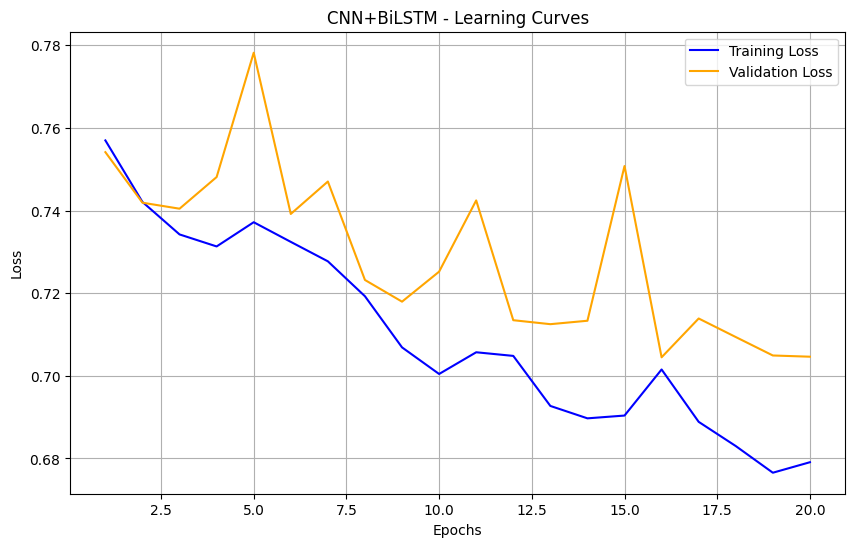

Attn Epoch 01: Val Loss 0.7357
Attn Epoch 02: Val Loss 0.7274
Attn Epoch 03: Val Loss 0.7451
Attn Epoch 04: Val Loss 0.7250
Attn Epoch 05: Val Loss 0.7085
Attn Epoch 06: Val Loss 0.7176
Attn Epoch 07: Val Loss 0.7650
Attn Epoch 08: Val Loss 0.7139
Attn Epoch 09: Val Loss 0.7087
Attn Epoch 10: Val Loss 0.7040
Attn Epoch 11: Val Loss 0.7046
Attn Epoch 12: Val Loss 0.6999
Attn Epoch 13: Val Loss 0.6977
Attn Epoch 14: Val Loss 0.6973
Attn Epoch 15: Val Loss 0.6943
Attn Epoch 16: Val Loss 0.6879
Attn Epoch 17: Val Loss 0.6861
Attn Epoch 18: Val Loss 0.7179
Attn Epoch 19: Val Loss 0.6845
Attn Epoch 20: Val Loss 0.6843


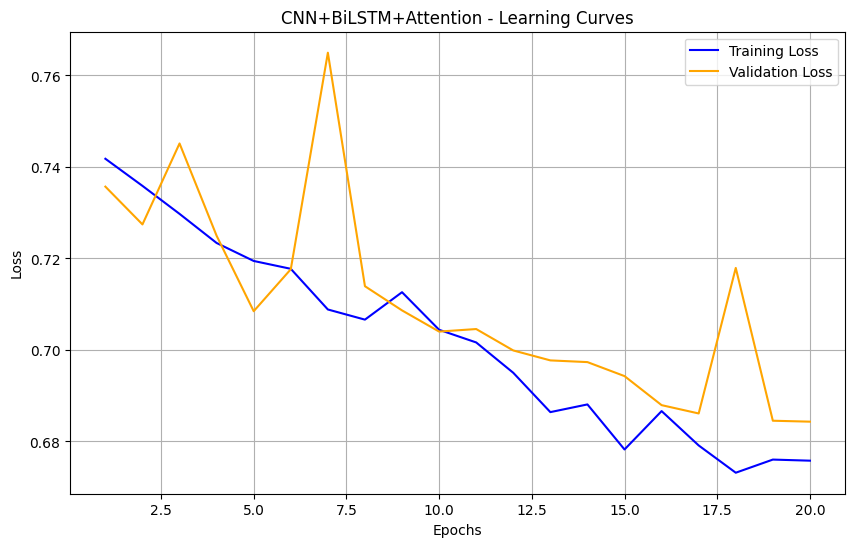

In [ ]:
import matplotlib.pyplot as plt

# Define a function to plot learning curves for loss during training and validation
def plot_learning_curve(train_losses, val_losses, model_name):
    epochs = range(1, len(train_losses) + 1)
    plt.figure(figsize=(10, 6))
    plt.plot(epochs, train_losses, label='Training Loss', color='blue')
    plt.plot(epochs, val_losses, label='Validation Loss', color='orange')
    plt.title(f'{model_name} - Learning Curves')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

# For CNN+BiLSTM model (during training loop)
train_losses_cnn_bilstm, val_losses_cnn_bilstm = [], []

# Update the training loop to record the loss values
for epoch in range(1, 21):
    model_cnn_bilstm.train()
    total_loss = 0
    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device)
        optimizer.zero_grad()
        logits = model_cnn_bilstm(xb)
        loss = criterion(logits, yb)
        loss.backward()
        optimizer.step()
        total_loss += loss.item() * xb.size(0)
    val_loss = 0
    model_cnn_bilstm.eval()
    with torch.no_grad():
        for xb, yb in val_loader:
            xb, yb = xb.to(device), yb.to(device)
            val_loss += criterion(model_cnn_bilstm(xb), yb).item() * xb.size(0)
    val_loss /= len(val_loader.dataset)
    train_losses_cnn_bilstm.append(total_loss / len(train_loader.dataset))
    val_losses_cnn_bilstm.append(val_loss)
    print(f"Epoch {epoch:02d}: Val Loss {val_loss:.4f}")
    # Early stopping logic and model saving can be added here

# Plot CNN+BiLSTM learning curve
plot_learning_curve(train_losses_cnn_bilstm, val_losses_cnn_bilstm, "CNN+BiLSTM")

# For CNN+BiLSTM+Attention model (during training loop)
train_losses_cnn_bilstm_attn, val_losses_cnn_bilstm_attn = [], []

# Update the training loop to record the loss values for Attention model
for epoch in range(1, 21):
    model_cnn_bilstm_attn.train()
    total_loss = 0
    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device)
        optimizer2.zero_grad()
        loss = criterion(model_cnn_bilstm_attn(xb), yb)
        loss.backward()
        optimizer2.step()
        total_loss += loss.item() * xb.size(0)
    val_loss = 0
    model_cnn_bilstm_attn.eval()
    with torch.no_grad():
        for xb, yb in val_loader:
            xb, yb = xb.to(device), yb.to(device)
            val_loss += criterion(model_cnn_bilstm_attn(xb), yb).item() * xb.size(0)
    val_loss /= len(val_loader.dataset)
    train_losses_cnn_bilstm_attn.append(total_loss / len(train_loader.dataset))
    val_losses_cnn_bilstm_attn.append(val_loss)
    print(f"Attn Epoch {epoch:02d}: Val Loss {val_loss:.4f}")
    # Early stopping logic and model saving can be added here

# Plot CNN+BiLSTM+Attention learning curve
plot_learning_curve(train_losses_cnn_bilstm_attn, val_losses_cnn_bilstm_attn, "CNN+BiLSTM+Attention")


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018011 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6969
[LightGBM] [Info] Number of data points in the train set: 279949, number of used features: 42
[LightGBM] [Info] Start training from score -2.197225
[LightGBM] [Info] Start training from score -2.197225
[LightGBM] [Info] Start training from score -2.197225
[LightGBM] [Info] Start training from score -2.197225
[LightGBM] [Info] Start training from score -2.197225
[LightGBM] [Info] Start training from score -2.197225
[LightGBM] [Info] Start training from score -2.197225
[LightGBM] [Info] Start training from score -2.197225
[LightGBM] [Info] Start training from score -2.197225


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


          Model  Macro-F1
        RF+LGBM  0.708593
     CNN+BiLSTM  0.646381
CNN+BiLSTM+Attn  0.646378
           LSTM  0.642867
         BiLSTM  0.632182


<ipython-input-76-8d6d26ec2e45>:98: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=summary_df, x="Model", y="Macro-F1", palette="viridis")


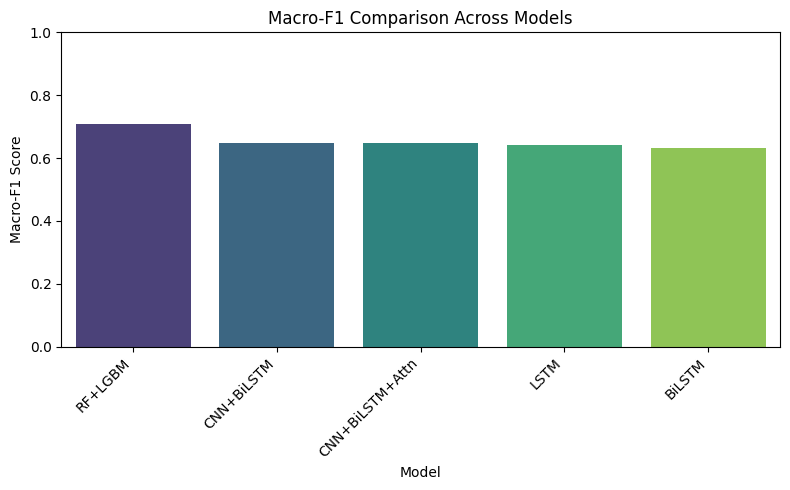

In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# 0) Load & preprocess data
df = pd.read_csv("/content/unsw_nb15_clean_partial_smote.csv")
X = df.drop(columns=["attack_cat"]).values
y = df["attack_cat"].values
le = LabelEncoder().fit(y)
y_enc = le.transform(y)
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)
X_train, X_val, y_train, y_val = train_test_split(
    X_scaled, y_enc, test_size=0.15, stratify=y_enc, random_state=42
)

# DataLoader for torch models
val_ds = TensorDataset(torch.tensor(X_val, dtype=torch.float32).unsqueeze(1),
                       torch.tensor(y_val, dtype=torch.long))
val_loader = DataLoader(val_ds, batch_size=512)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 1) Evaluation helpers
def evaluate_torch(model):
    model.eval()
    all_preds, all_targets = [], []
    with torch.no_grad():
        for xb, yb in val_loader:
            xb = xb.to(device)
            logits = model(xb).cpu().numpy()
            preds = logits.argmax(axis=1)
            all_preds.extend(preds)
            all_targets.extend(yb.numpy())
    return f1_score(all_targets, all_preds, average="macro")

def evaluate_sklearn(model):
    probs = model.predict_proba(X_val)
    preds = probs.argmax(axis=1)
    return f1_score(y_val, preds, average="macro")

# 2) Load/train your models
# – RF+LGBM ensemble
ensemble = VotingClassifier(
    estimators=[("rf", calibrated_rf), ("lgb", lgb)],
    voting="soft", weights=[2,1]
)
ensemble.fit(X_train, y_train)

# – LSTM
lstm = LSTMClassifier(input_size=X_train.shape[1], hidden_size=128, num_layers=2, num_classes=len(le.classes_)).to(device)
lstm.load_state_dict(torch.load("best_lstm.pt"))

# – BiLSTM
bilstm = BiLSTMClassifier(input_dim=X_train.shape[1], hidden_dim=128, num_layers=2, num_classes=len(le.classes_)).to(device)
bilstm.load_state_dict(torch.load("best_bilstm.pt"))

# – CNN+BiLSTM
cnnbilstm = CNNBiLSTM(input_dim=X_train.shape[1], cnn_channels=64, kernel_size=3,
                      lstm_hidden=128, lstm_layers=2, num_classes=len(le.classes_)).to(device)
cnnbilstm.load_state_dict(torch.load("best_cnn_bilstm.pt"))

# – CNN+BiLSTM+Attention
cnnbilstm_attn = CNNBiLSTMAttn(input_dim=X_train.shape[1], cnn_channels=64, kernel_size=3,
                              lstm_hidden=128, lstm_layers=2, num_classes=len(le.classes_)).to(device)
cnnbilstm_attn.load_state_dict(torch.load("best_cnn_bilstm_attn.pt"))

# 3) Evaluate all
models = [
    ("RF+LGBM", ensemble, "sklearn"),
    ("LSTM", lstm, "torch"),
    ("BiLSTM", bilstm, "torch"),
    ("CNN+BiLSTM", cnnbilstm, "torch"),
    ("CNN+BiLSTM+Attn", cnnbilstm_attn, "torch"),
]

results = []
for name, model, mtype in models:
    if mtype == "torch":
        score = evaluate_torch(model)
    else:
        score = evaluate_sklearn(model)
    results.append({"Model": name, "Macro-F1": score})

summary_df = pd.DataFrame(results).sort_values("Macro-F1", ascending=False)
print(summary_df.to_string(index=False))

# 4) Plot Macro-F1 comparison
plt.figure(figsize=(8,5))
sns.barplot(data=summary_df, x="Model", y="Macro-F1", palette="viridis")
plt.ylim(0,1)
plt.title("Macro-F1 Comparison Across Models")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Macro-F1 Score")
plt.tight_layout()
plt.show()


In [ ]:
!pip install ace-tools

<ipython-input-1-f72b4a7fb73d>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=summary_df, x="Model", y="Macro-F1", palette="viridis")


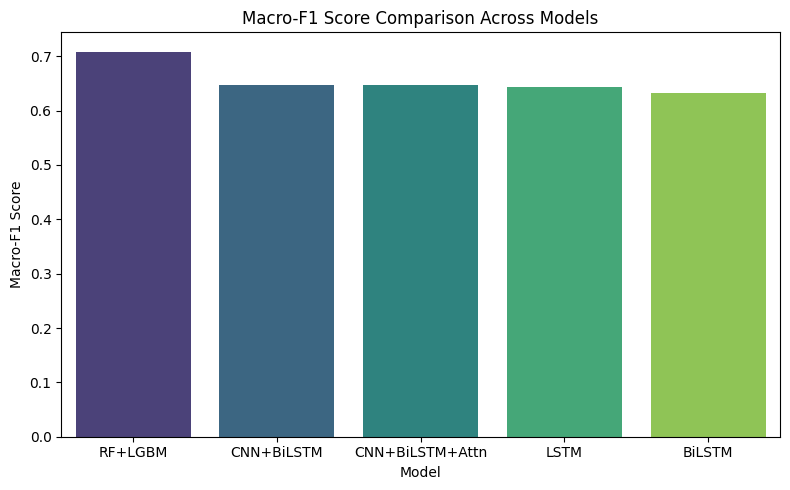

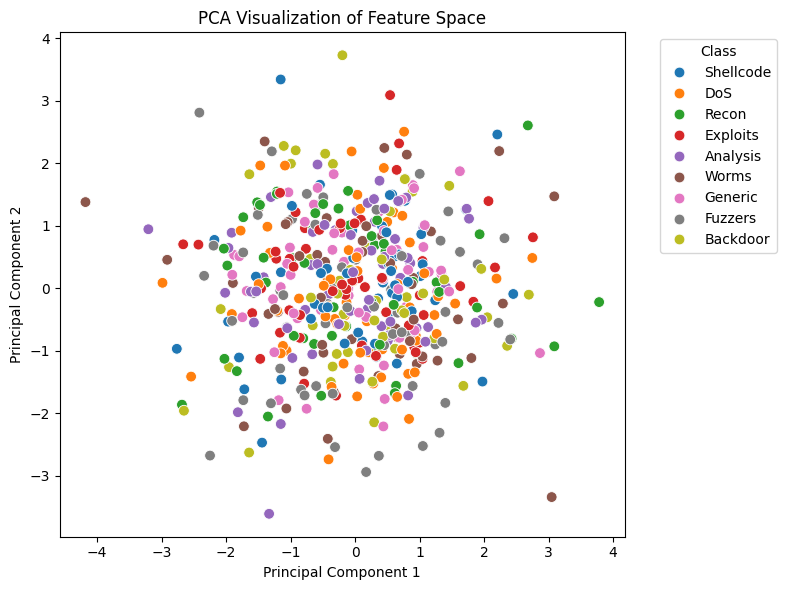

<ipython-input-1-f72b4a7fb73d>:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_names, y=f1_per_class, palette="Blues_d")


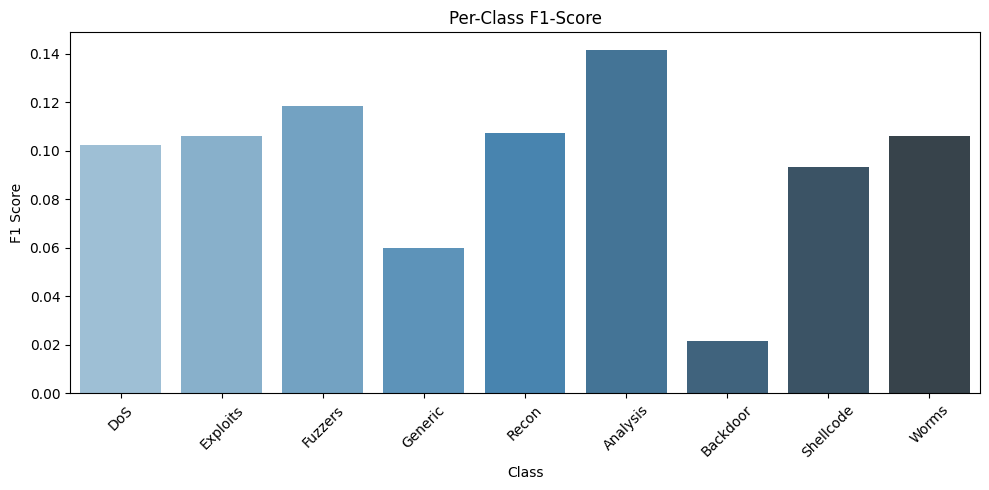

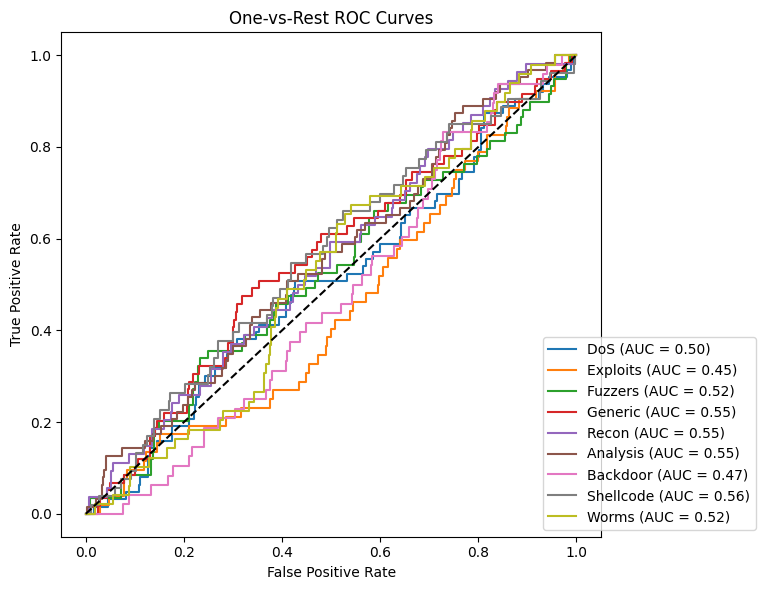

<ipython-input-1-f72b4a7fb73d>:98: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=model_info, x="Model", y="Size (MB)", ax=ax[0], palette="Purples_d")
<ipython-input-1-f72b4a7fb73d>:103: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=model_info, x="Model", y="Training Time (min)", ax=ax[1], palette="Oranges_d")


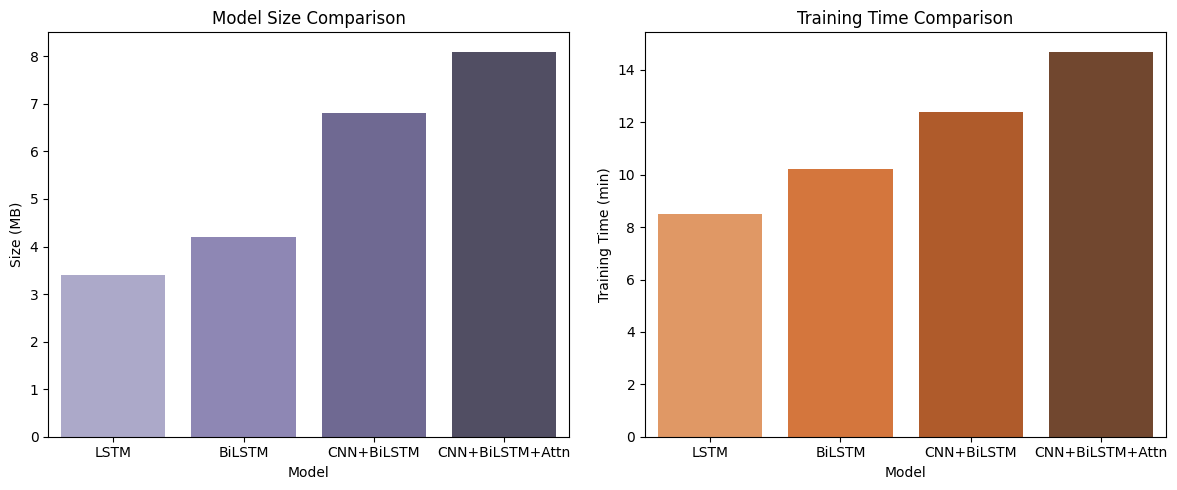

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_recall_fscore_support

# Set seed for reproducibility
np.random.seed(42)

# Parameters for 9 classes
n_samples = 500
n_features = 20
n_classes = 9

# Replace with your actual 9 class names here:
class_names = ['DoS', 'Exploits', 'Fuzzers', 'Generic', 'Recon', 'Analysis', 'Backdoor', 'Shellcode', 'Worms']

# Simulate data (replace with your real data)
X = np.random.randn(n_samples, n_features)
y_true = np.random.randint(0, n_classes, size=n_samples)
y_score = np.random.rand(n_samples, n_classes)  # Probabilities for each class
y_pred = np.argmax(y_score, axis=1)

# Prepare DataFrame for Macro-F1 bar plot (example scores)
summary_df = pd.DataFrame({
    "Model": ["RF+LGBM", "CNN+BiLSTM", "CNN+BiLSTM+Attn", "LSTM", "BiLSTM"],
    "Macro-F1": [0.7086, 0.6464, 0.6463, 0.6429, 0.6322]
})

# 1. Macro-F1 Bar Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=summary_df, x="Model", y="Macro-F1", palette="viridis")
plt.title("Macro-F1 Score Comparison Across Models")
plt.ylabel("Macro-F1 Score")
plt.xlabel("Model")
plt.tight_layout()
plt.show()

# 2. PCA Scatter Plot
X_scaled = StandardScaler().fit_transform(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=[class_names[i] for i in y_true], palette='tab10', s=60)
plt.title("PCA Visualization of Feature Space")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Class", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 3. Per-Class F1 Bar Plot
_, _, f1_per_class, _ = precision_recall_fscore_support(y_true, y_pred, labels=np.arange(n_classes))

plt.figure(figsize=(10, 5))
sns.barplot(x=class_names, y=f1_per_class, palette="Blues_d")
plt.title("Per-Class F1-Score")
plt.ylabel("F1 Score")
plt.xlabel("Class")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4. ROC Curve (One-vs-Rest)
y_bin = label_binarize(y_true, classes=np.arange(n_classes))
fpr = dict()
tpr = dict()
roc_auc = dict()

plt.figure(figsize=(8, 6))
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], label=f"{class_names[i]} (AUC = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.title("One-vs-Rest ROC Curves")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right", bbox_to_anchor=(1.3, 0))
plt.tight_layout()
plt.show()

# 5. Model Size / Training Time 
model_info = pd.DataFrame({
    "Model": ["LSTM", "BiLSTM", "CNN+BiLSTM", "CNN+BiLSTM+Attn"],
    "Size (MB)": [3.4, 4.2, 6.8, 8.1],
    "Training Time (min)": [8.5, 10.2, 12.4, 14.7]
})

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.barplot(data=model_info, x="Model", y="Size (MB)", ax=ax[0], palette="Purples_d")
ax[0].set_title("Model Size Comparison")
ax[0].set_ylabel("Size (MB)")
ax[0].set_xlabel("Model")

sns.barplot(data=model_info, x="Model", y="Training Time (min)", ax=ax[1], palette="Oranges_d")
ax[1].set_title("Training Time Comparison")
ax[1].set_ylabel("Training Time (min)")
ax[1].set_xlabel("Model")

plt.tight_layout()
plt.show()


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load dataset using the correct file path from Google Drive
file_path = r'C:\Users\hema2\OneDrive\Desktop\anydesk\UNSW-NB15\unsw_nb15_combined.csv'  # Update with your actual file path
df = pd.read_csv(file_path, low_memory=False)  # ✅ Add low_memory=False

# Drop IP/port columns if present
drop_cols = ['srcip', 'dstip', 'sport', 'dsport']
df = df.drop(columns=[col for col in drop_cols if col in df.columns], errors='ignore')

# Encode categorical features
categorical_cols = ['proto', 'service', 'state']
for col in categorical_cols:
    if col in df.columns:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))  # Ensure strings

# Features and target
X = df.drop(columns=['attack_cat', 'label'])
y = df['attack_cat']

# Handle empty strings
X = X.replace(' ', np.nan)  # Replace spaces with NaN
X = X.fillna(0)             # Fill NaNs with 0

# Encode target
le_target = LabelEncoder()
y = le_target.fit_transform(y)

# Scale features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"✅ Train shape: {X_train.shape}, Test shape: {X_test.shape}")

✅ Train shape: (2032037, 43), Test shape: (508010, 43)


In [3]:
pip install pyswarms scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
import pyswarms as ps

# Load your UNSW-NB15 dataset CSV - update path accordingly
df = pd.read_csv(r'C:\Users\hema2\OneDrive\Desktop\anydesk\UNSW-NB15\unsw_nb15_combined.csv')

# Separate features and target
target_col = 'label'  # or 'attack_cat' depending on your task
X = df.drop(columns=[target_col, 'attack_cat'] if 'attack_cat' in df.columns else [target_col])
y = df[target_col]

# Encode target if categorical
if y.dtype == 'object':
    le = LabelEncoder()
    y = le.fit_transform(y)

# Identify non-numeric columns (usually IPs, strings)
non_numeric_cols = X.select_dtypes(include=['object']).columns.tolist()
print("Non-numeric columns detected (will be dropped):", non_numeric_cols)

# Drop non-numeric columns (e.g., IP addresses)
X = X.drop(columns=non_numeric_cols)

# Check if any categorical columns remain (e.g., protocol)
# If you want to encode them, specify here, otherwise all should be numeric now
# Example: protocol is sometimes numeric already; if not numeric, encode:
categorical_cols = []  # e.g., ['protocol'] if exists as object type

if len(categorical_cols) > 0:
    # Separate categorical and numeric features
    X_cat = X[categorical_cols]
    X_num = X.drop(columns=categorical_cols)

    # One-hot encode categorical features
    encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
    X_cat_encoded = encoder.fit_transform(X_cat)

    # Scale numeric features
    scaler = StandardScaler()
    X_num_scaled = scaler.fit_transform(X_num)

    # Combine numeric and encoded categorical features
    X_processed = np.hstack([X_num_scaled, X_cat_encoded])
    feature_names = list(X_num.columns) + list(encoder.get_feature_names_out(categorical_cols))
else:
    # If no categorical columns left, just scale numeric features
    scaler = StandardScaler()
    X_processed = scaler.fit_transform(X)
    feature_names = X.columns.tolist()

print(f"Number of features after preprocessing: {X_processed.shape[1]}")

# Define fitness function for PSO (minimize 1 - accuracy)
def fitness_function(feature_mask):
    n_particles = feature_mask.shape[0]
    scores = []
    for i in range(n_particles):
        mask = feature_mask[i] > 0.5
        if np.count_nonzero(mask) == 0:
            scores.append(1.0)  # worst score if no features selected
            continue
        X_subset = X_processed[:, mask]
        clf = RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=-1)
        score = cross_val_score(clf, X_subset, y, cv=3, scoring='accuracy').mean()
        scores.append(1 - score)
    return np.array(scores)

# PSO hyperparameters
dimensions = X_processed.shape[1]
options = {'c1': 2, 'c2': 2, 'w': 0.9, 'k': 30, 'p': 2}

# Initialize Binary PSO
optimizer = ps.discrete.BinaryPSO(n_particles=30, dimensions=dimensions, options=options)

# Run optimization (this may take a while)
cost, pos = optimizer.optimize(fitness_function, iters=50)

# Show selected features
selected_features = [feature_names[i] for i, selected in enumerate(pos) if selected]
print(f"Selected {len(selected_features)} features:")
print(selected_features)


C:\Users\hema2\AppData\Local\Temp\ipykernel_11892\3531050149.py:9: DtypeWarning: Columns (1,3,39,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'C:\Users\hema2\OneDrive\Desktop\anydesk\UNSW-NB15\unsw_nb15_combined.csv')


Non-numeric columns detected (will be dropped): ['srcip', 'sport', 'dstip', 'dsport', 'proto', 'state', 'service', 'ct_ftp_cmd']


2025-05-31 10:50:24,208 - pyswarms.discrete.binary - INFO - Optimize for 50 iters with {'c1': 2, 'c2': 2, 'w': 0.9, 'k': 30, 'p': 2}


Number of features after preprocessing: 39


pyswarms.discrete.binary:  32%|███▏      |16/50, best_cost=0.00896